# Trabalho Prático Introdução à Ciência dos Dados

## Nome, matrícula e perfil de usuário dos Integrantes
- Álvaro Gomes da Silva Neto - 5095 - alvaroags
- Danilo Matos de Oliveira - 5073 - DanMO23
- Manuel Ferreira Ribeiro Di Simões - 5091 - ManuelFerreira90
- Tarik Salles Paiva - 5059 - TarikSalles


## Perguntas
1. Como a nota do ENEM influencia na evasão dos estudantes?
2. Quais os períodos que possuem mais abandono?
3. Quais cursos apresentam as maiores taxas de abandono?
4. Como varia a taxa de abandono para o mesmo curso em diferentes campus?
5. Existe uma correlação entre o nível de dificuldade de ingresso em um curso e a taxa de conclusão dos estudantes?
6. Como a idade de admissão dos alunos impacta a taxa de evasão? Há uma tendência de evasão mais elevada entre os alunos mais jovens ou mais velhos?
7. Há correlação entre a modalidade de inscrição dos alunos (ampla concorrência, cotas sociais, cotas raciais) e a evasão?
8. Existe relação entre o número de reprovações e a probabilidade de evasão dos alunos?
9. Há diferença significativa na evasão entre os sexos? E entre diferentes campus da UFV?
10. Quais são as principais caracteristicas daqueles que evadem o curso? E daqueles que concluem?

## Importando Bibliotecas

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score




## Lendo Dados

In [19]:
df = pd.read_csv("Dados de estudantes da UFV - 2022-12-12.csv")

## Limpeza de Dados



### Remoção de linhas para coluna "Sexo" nula


#### Como os valores nulos da coluna "Sexo" representam uma porcentagem muita pequena do dataset original, decidimos remover as linhas contendo a coluna "Sexo" nula.

In [20]:
df = df.dropna(subset=["Sexo"])

### Remoção de linhas para coluna "UF_Nascimento" nula


#### Como os valores nulos da coluna "UF_Nascimento" representam uma porcentagem muita pequena do dataset original, decidimos remover as linhas contendo a coluna "UF_Nascimento" nula.

In [21]:
df = df.dropna(subset=["UF_Nascimento"])

### Remoção de linhas para coluna "Ano_Nascimento" nula


#### Como os valores nulos da coluna "Ano_Nascimento" representam uma porcentagem muita pequena do dataset original, decidimos remover as linhas contendo a coluna "Ano_Nascimento" nula.

In [22]:
df = df.dropna(subset=["Ano_Nascimento"])

### Remoção de linhas para coluna "CRA" nula

#### Como os valores nulos da coluna "CRA" representam uma porcentagem muita pequena do dataset original, decidimos remover as linhas contendo a coluna "CRA" nula.

In [23]:
df = df.dropna(subset=["CRA"])

### Remoção de valores nulos em colunas não numéricas


In [24]:
df = df.dropna(subset=df.select_dtypes(exclude='number').columns)

### Limpeza dos espaços extras em todas as colunas não numéricas

#### Remoção de espaços extras antes e depois de palavras em todas as colunas não numéricas.

In [25]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\3389240528.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### Removendo redudâncias e arrumando erros de ortografia na coluna "Curso"

#### Retirando cabeçalhos desnecessários, como o Campus, pois já existe uma coluna identificando o Campus de cada curso no Dataset, e normalizando o nome dos cursos para que fiquem igual entre os campi.

In [26]:
df["Curso"] = df["Curso"].str.replace("CAV - ", "")
df["Curso"] = df["Curso"].str.replace("CAF - ", "")
df["Curso"] = df["Curso"].str.replace("CRP - ", "")


In [27]:
df['Curso'] = df['Curso'].apply(lambda x: x.title())

In [28]:
df['Curso'] = df['Curso'].replace({
    'Licenciatura Em Fisica': 'Licenciatura Em Física',
    'Física - Licenciatura': 'Licenciatura Em Física',
    'Educação Física - Licenciatura': 'Licenciatura Em Educação Física',
    'Matemática - Licenciatura': 'Licenciatura Em Matemática',
    'Química - Licenciatura': 'Licenciatura Em Química',
    'Ciências Biológicas - Licenciatura': 'Licenciatura Em Ciências Biológicas',
    'Bacharelado Em Educação Física': "Educação Física"
})
df['Curso']

0                  Administração
1                  Administração
2                  Administração
3                  Administração
4                  Administração
                  ...           
74012        Ciências Biológicas
74013         Ciências Contábeis
74014        Ciências Biológicas
74015    Administração - Noturno
74017                    Química
Name: Curso, Length: 73868, dtype: object

In [29]:
for i in df['Curso'].unique():
  print(i)

Administração
Engenharia De Agrimensura
Agronomia
Ciências Contábeis
Gestão Do Agronegócio
Engenharia Ambiental
Engenharia De Produção
Ciências Econômicas
Economia Doméstica
Educação Física
Engenharia Agrícola E Ambiental
Engenharia Civil
Engenharia Florestal
Engenharia De Alimentos
Medicina Veterinária
Nutrição
Pedagogia
Ciência E Tecnologia De Laticínios
Ciências Biológicas
Física
Matemática
Zootecnia
Química
Direito
Arquitetura E Urbanismo
Letras
Secretariado Executivo Trilíngue, Português, Francês, Inglês
Administração - Habilitação Em Administração De Cooperativas
Ciência Da Computação
Licenciatura Em Física
Bioquímica
Comunicação Social
Engenharia Elétrica
Geografia
História
Gestão De Cooperativas
Dança
Licenciatura Em Pedagogia
Normal Superior
Biologia
Engenharia De Agrimensura E Cartográfica
Educação Infantil
Engenharia Química
Engenharia Mecânica
Administração - Integral
Administração - Noturno
Tecnologia Em Gestão Ambiental
Tecnologia Em Análise E Desenvolvimento De Sistemas


In [30]:
df['Curso'].value_counts()

Curso
Agronomia                                                       7361
Administração                                                   2770
Ciências Biológicas                                             2432
Educação Física                                                 2302
Engenharia Civil                                                2290
                                                                ... 
Ciências Econômicas - Ênfase Em Economia                         185
Tecnologia Em Análise E Desenvolvimento De Sistemas              160
Ciências Econômicas - Ênfase Em Agronegócio                      120
Administração - Habilitação Em Administração De Cooperativas      35
Biologia                                                           1
Name: count, Length: 66, dtype: int64

### Limpando Coluna "Cidade"

In [31]:
#Remoção de possíveis Estados que apareçam nas cidades. Ex: "Florestal - MG", somente é necessário "Florestal"
df["Municipio_Nascimento"] = df["Municipio_Nascimento"].str.split("-", n=1, expand=True)[0]

In [32]:
#Remoção de valores nulos
df = df.dropna(subset=['Municipio_Nascimento'])

In [33]:
#Cidades agora somente possuem caps nas letras iniciais para cada palavra que as formam
df['Municipio_Nascimento'] = df['Municipio_Nascimento'].apply(lambda x: x.title())


### Preenchendo Valores Vazios na coluna "Codigo_Situacao_Aluno" com valores da coluna "Situacao_Aluno"

#### O Código de situação do aluno é um valor unitário que representa a situação do aluno.

In [34]:
df['Codigo_Situacao_Aluno'].fillna(df['Situacao_Aluno'].str[0], inplace=True)


C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2152904300.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Codigo_Situacao_Aluno'].fillna(df['Situacao_Aluno'].str[0], inplace=True)


### Consertando Cidades Erradas na Coluna "Cidade"




#### Existem algumas cidades que estão erradas, algumas com erros de acentuação e ortográficos. Outras com pedaços faltantes, especialmente com cidades formadas por mais de uma palavra.

#### A fim de resolver em grande parte essa situação, podemos incluir um outro dataset contendo todas as cidades do país, e, por meio do método de aproximação de palavras por distância (Levenshtein), que está disponível na biblioteca difflib nativa do python, podemos encontrar as cidades correspondentes.

#### Para evitar aproximações de palavras incorretas, a cidade correspondente deve ser 80% similar à cidade original, caso contrário, não pode ser correspondente.

#### No final, os resultados são salvos em outro dataset a fim de consertar as cidades que tiveram correspondências válidas, o restante deverão ser analisados manualmente, visto que o dataset de cidades do Brasil talvez não abranja todas as cidades de fato, e considerando que há alunos que nasceram no exterior.

In [35]:
import difflib #biblioteca nativa com a distância de Levenshtein
df_nascimento = df.copy()  # Clone do df original
df_cidades = pd.read_csv('brazilian-cities.csv')  # Dataset com todas as Cidades

# Limpar espaços e padronizar capitalização
df_nascimento['Municipio_Nascimento'] = df_nascimento['Municipio_Nascimento'].str.strip().str.title()
df_cidades['city'] = df_cidades['city'].str.strip().str.title()

# Obter lista de cidades válidas
cidades_validas = df_cidades['city'].unique()

def distancia_Levenshtein(user_input, city_list):
    semelhantes = difflib.get_close_matches(user_input, city_list, cutoff=0.8) #Semelhantes com pelo menos 80% de semelhança
    if semelhantes:
        return semelhantes[0]
    else:
        return "Sem semelhantes"

# Se a cidade estiver no dataset das cidades do Brasil, ela existe e é válida
df_nascimento['Valido'] = df_nascimento['Municipio_Nascimento'].apply(lambda x: x in cidades_validas)

# Cidades não válidas são vistas como erradas
df_errados = df_nascimento[~df_nascimento['Valido']]
print("número de cidades erradas antes da correção: ", len(df_errados))

# Adicionar coluna com a cidade corrigida
df_errados.loc[:, 'Cidade_Corrigida'] = df_errados['Municipio_Nascimento'].apply(lambda x: distancia_Levenshtein(x, cidades_validas))

# Criar o novo dataset com Identificador, Municipio_Nascimento incorreto e Cidade_Corrigida
df_errados_final = df_errados[['Identificador', 'Municipio_Nascimento', 'Cidade_Corrigida']]

df_errados_final.to_csv('dataset_errados.csv', index=False)

print("número de cidades erradas após a correção: ", df_errados_final[df_errados_final["Cidade_Corrigida"] == "Sem semelhantes"].shape[0])


número de cidades erradas antes da correção:  1747
número de cidades erradas após a correção:  357


C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2784319169.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errados.loc[:, 'Cidade_Corrigida'] = df_errados['Municipio_Nascimento'].apply(lambda x: distancia_Levenshtein(x, cidades_validas))


#### Adicionando cidades corrigidas no Dataset Original (O restante, como dito, será avaliado manualmente):

In [36]:
for index, row in df_errados_final.iterrows():
    if row['Cidade_Corrigida'] != "Sem semelhantes": #Somente cidades com semelhantes são adicionadas
        df.loc[df['Identificador'] == row['Identificador'], 'Municipio_Nascimento'] = row['Cidade_Corrigida'] #Analisa  pelo identificador do aluno, disponível em ambos os datasets


#### Adicionando cidades corrigidas manualmente no Dataset Original (Corrigidas pelo grupo)

In [37]:
df_cidades_corrigidas_manual = pd.read_csv("Cidades_Limpas_Manual.txt",delimiter=',') #Txt com o delimitador ',' para indicar cada elemento

correcoes = df_cidades_corrigidas_manual.set_index('Identificador')['Cidade'].to_dict() #Transformação para dicionário
df.loc[df['Identificador'].isin(correcoes.keys()), 'Municipio_Nascimento'] = df['Identificador'].map(correcoes) #Cidades encontradas baseadas no Identificador de ambos os datasets
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) #Remoção de espaços em branco extras

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2371763233.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) #Remoção de espaços em branco extras


#### Removendo cidades desconhecidas no Dataset Original

#### Há cidades com o valor 'unknown' que determina que a cidade não é existente. Isso ocorre quando, por exemplo, a cidade é um estado ou um país, sendo impossível sua real determinação, e sendo necessária a sua exclusão.

In [38]:
df = df[df['Municipio_Nascimento'] != 'unknown']

### Transformando coluna "Ano_Nascimento" em inteiro

#### É necessário pois os elementos da coluna "Ano_Nascimento" devem ser inteiros

In [39]:
df['Ano_Nascimento'] = df['Ano_Nascimento'].astype('Int64')
df['Ano_Nascimento']

0        1982
1        1982
2        1979
3        1979
4        1980
         ... 
74012    1995
74013    1998
74014    1998
74015    1995
74017    1997
Name: Ano_Nascimento, Length: 73865, dtype: Int64

### Transformando coluna "Modalidade_Inscrita" em inteiro

#### É necessário pois os elementos da coluna "Modalidade_Inscrita" devem ser inteiros

In [40]:
df['Modalidade_Inscrita'] = df['Modalidade_Inscrita'].astype('Int64')
df['Modalidade_Inscrita']

0        0
1        0
2        0
3        0
4        0
        ..
74012    0
74013    0
74014    0
74015    0
74017    0
Name: Modalidade_Inscrita, Length: 73865, dtype: Int64

### Criação de Dataframe "df_enem"

#### Como o foco principal do trabalho é análise do ENEM em relação ao CRA, como a quantidade de notas do ENEM nulas é muita grande, decidimos criar outro dataframe contendo as notas do ENEM não nulas. Para outras métricas em que o ENEM não é importante, decidimos continuar com o anterior, pois são muitos dados perdidos que poderiam influenciar em outra medida.

#### Caso contrário, permaneceremos utilizando o dataframe original.

In [41]:
df_enem = df.dropna(subset=["ENEM","Modalidade_Inscrita"])


### Criação de coluna "Evasao"

#### Coluna criada com o propósito de codificar a situação do aluno (Evasão = 1, Não Evasão = 0)

In [42]:
df['Evasao'] = df['Situacao_Aluno_Agrupada'].apply(lambda x: 1 if x == 'Evasão' else 0)
df['Evasao']

0        1
1        1
2        0
3        0
4        0
        ..
74012    0
74013    0
74014    0
74015    0
74017    0
Name: Evasao, Length: 73865, dtype: int64

### Criação de coluna "Periodo_Saida_Ano"

#### Em um ano há pelo menos 2 períodos. Foi criada essa coluna para indicar em qual semestre do ano o aluno saiu.

In [43]:
def extrair_periodo(saida):
  #Função que retona 0 caso a Saída for 0, ou seja, o aluno não concluiu o curso, e retorna o período caso contrário (o período é definido da forma 20xx/{periodo}), ou seja, segunda parte de um split por "/"
    if saida == '0':
        return 0
    else:
        return int(saida.split('/')[1])

def extrair_ano(saida):
  #Função que retona 0 caso a Saída for 0, ou seja, o aluno não concluiu o curso, e retorna o ano caso contrário (o ano é definido da forma {ano}/{periodo}), ou seja, primeira parte de um split por "/"
    if saida == '0':
        return 0
    else:
        return int(saida.split('/')[0])

df['Periodo_Saida_Ano'] = df['Saida'].apply(extrair_periodo)
df["Saida"] = df["Saida"].apply(extrair_ano)
df['Admissao'] = df['Admissao'].apply(extrair_ano)

### Função para calcular periodo de saída

In [44]:
#
def calcular_periodo(admissao, saida, periodo):
    adm_ano =  admissao
    saida_ano =  saida

    diff_anos = saida_ano - adm_ano

    diff_anos *= 2

    diff_anos += periodo

    return diff_anos

## Fazendo Análise dos Dados

### Histograma de notas do ENEM

#### A distribuição de notas do ENEM não nulas. Com o teste de shapiro, percebemos que não segue uma distribuição normal.

A distribuição não é normal


c:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37716.
  res = hypotest_fun_out(*samples, **kwds)


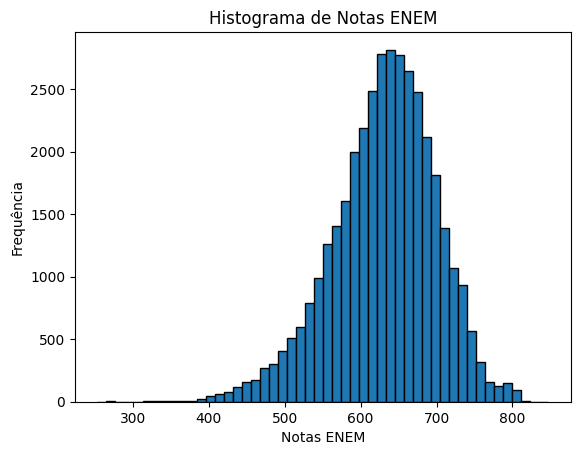

In [45]:
plt.hist(df_enem['ENEM'],  edgecolor='black',bins=50)

plt.xlabel('Notas ENEM')
plt.ylabel('Frequência')
plt.title('Histograma de Notas ENEM')

res = stats.shapiro(df_enem['ENEM'])
if res.pvalue < 0.05:
    print("A distribuição não é normal")

### Histograma de CRA Geral

#### A distribuição de CRAs não nulos. Fizemos essa filtragem pois há vários alunos que não possuiam o valor de CRA em sua época, resultando em CRAs com valores zerados. Também podem haver outros fatores que não são relevantes para essa análise.

Text(0.5, 1.0, 'Histograma CRA')

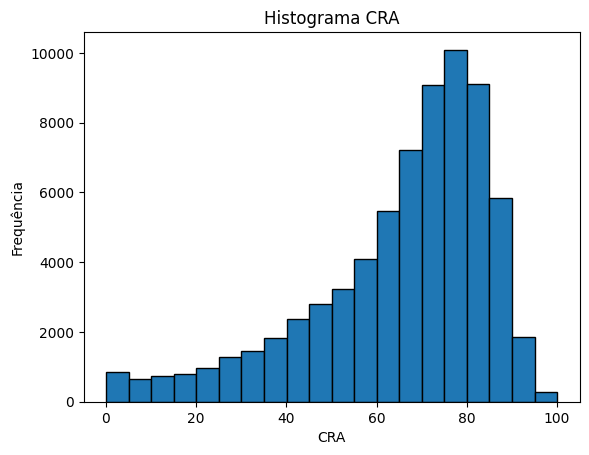

In [46]:
plt.hist(df[df['CRA'] > 0]["CRA"],  edgecolor='black',bins = 20) #Somente valores "CRA" não nulos

plt.xlabel('CRA')
plt.ylabel('Frequência')
plt.title('Histograma CRA')


### Histograma de CRA no Campus Viçosa


#### A distribuição de CRAs não nulos. Fizemos essa filtragem pois há vários alunos que não possuiam o valor de CRA em sua época, resultando em CRAs com valores zerados. Também podem haver outros fatores que não são relevantes para essa análise.

Text(0.5, 1.0, 'Histograma CRA de Viçosa')

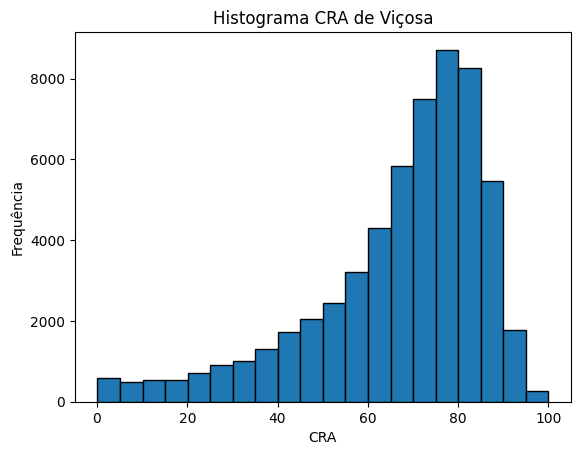

In [47]:
cra_campus_vicosa = df[df['Campus'] == "CAV"] #Somente os dados do campus Viçosa

plt.hist(cra_campus_vicosa[cra_campus_vicosa['CRA'] > 0]["CRA"],  edgecolor='black',bins=20) #Somente valores "CRA" não nulos

plt.xlabel('CRA')
plt.ylabel('Frequência')
plt.title('Histograma CRA de Viçosa')

### Histograma de CRA no Campus Florestal

#### A distribuição de CRAs não nulos. Fizemos essa filtragem pois há vários alunos que não possuiam o valor de CRA em sua época, resultando em CRAs com valores zerados. Também podem haver outros fatores que não são relevantes para essa análise.

Text(0.5, 1.0, 'Histograma CRA de Florestal')

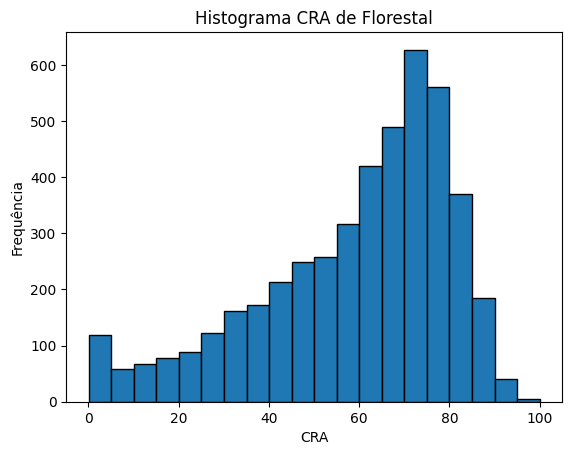

In [48]:
cra_campus_florestal = df[df['Campus'] == "CAF"] #Somente os dados do campus Florestal

plt.hist(cra_campus_florestal[cra_campus_florestal['CRA'] > 0]["CRA"],  edgecolor='black',bins=20) #Somente valores "CRA" não nulos

plt.xlabel('CRA')
plt.ylabel('Frequência')
plt.title('Histograma CRA de Florestal')

### Histograma de CRA no Campus Rio Paranaiba

#### A distribuição de CRAs não nulos. Fizemos essa filtragem pois há vários alunos que não possuiam o valor de CRA em sua época, resultando em CRAs com valores zerados. Também podem haver outros fatores que não são relevantes para essa análise.

Text(0.5, 1.0, 'Histograma CRA de Rio Paranaiba')

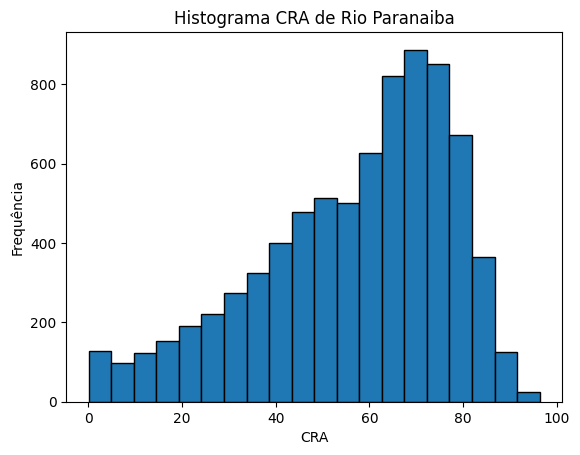

In [49]:
cra_campus_rio_paranaiba = df[df['Campus'] == "CRP"] #Somente os dados do campus Rio Paranaiba

plt.hist(cra_campus_rio_paranaiba[cra_campus_rio_paranaiba['CRA'] > 0]["CRA"],  edgecolor='black',bins=20)

plt.xlabel('CRA')
plt.ylabel('Frequência')
plt.title('Histograma CRA de Rio Paranaiba')

### Comparação estudantes totais de todos os Campus

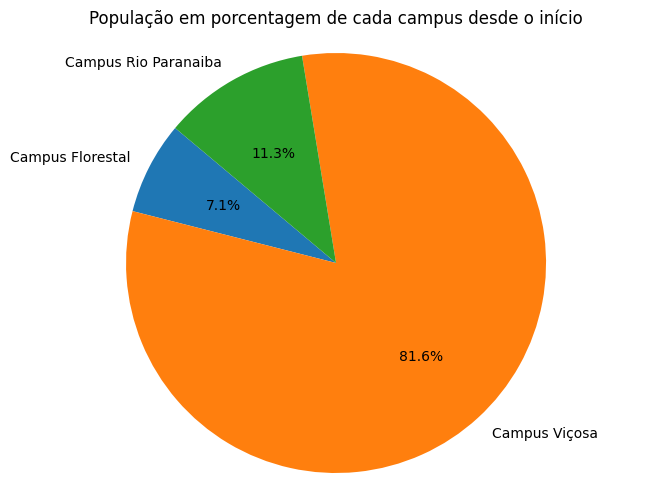

In [50]:
populacao_campus = {"Campus Florestal": len(df[df['Campus'] == "CAF"]),
    "Campus Viçosa":  len(df[df['Campus'] == "CAV"]),
    "Campus Rio Paranaiba": len(df[df['Campus'] == "CRP"])}

labels = populacao_campus.keys()
sizes = populacao_campus.values()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('População em porcentagem de cada campus desde o início')

plt.show()

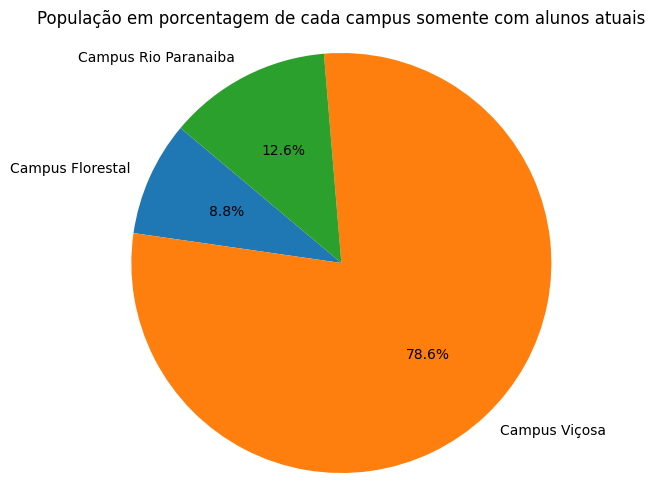

In [51]:
populacao_campus = {
    "Campus Florestal": len(df[(df['Campus'] == "CAF") & (df['Situacao_Aluno'] == "Normal")]),
    "Campus Viçosa": len(df[(df['Campus'] == "CAV") & (df['Situacao_Aluno'] == "Normal")]),
    "Campus Rio Paranaiba": len(df[(df['Campus'] == "CRP") & (df['Situacao_Aluno'] == "Normal")])
}

labels = populacao_campus.keys()
sizes = populacao_campus.values()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('População em porcentagem de cada campus somente com alunos atuais')

plt.show()

### Comparação dos CRA Médios de todos os Campus (0 até o maior CRA entre os campi)

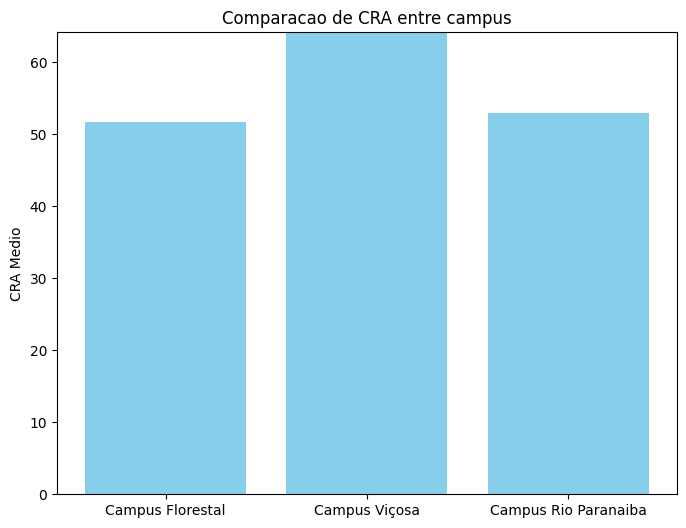

In [52]:
cra_medios = {"Campus Florestal": cra_campus_florestal['CRA'].mean(),
              "Campus Viçosa": cra_campus_vicosa['CRA'].mean(),
              "Campus Rio Paranaiba":cra_campus_rio_paranaiba['CRA'].mean()}

plt.figure(figsize=(8, 6))
plt.bar(cra_medios.keys(), cra_medios.values(), color='skyblue')
plt.xlabel('')
plt.ylabel('CRA Medio')
plt.title('Comparacao de CRA entre campus')
plt.ylim(0, max(cra_medios.values()))  # Set y-axis limit from 0 to 100
plt.show()

### Boxplot Notas do ENEM para todos os campi

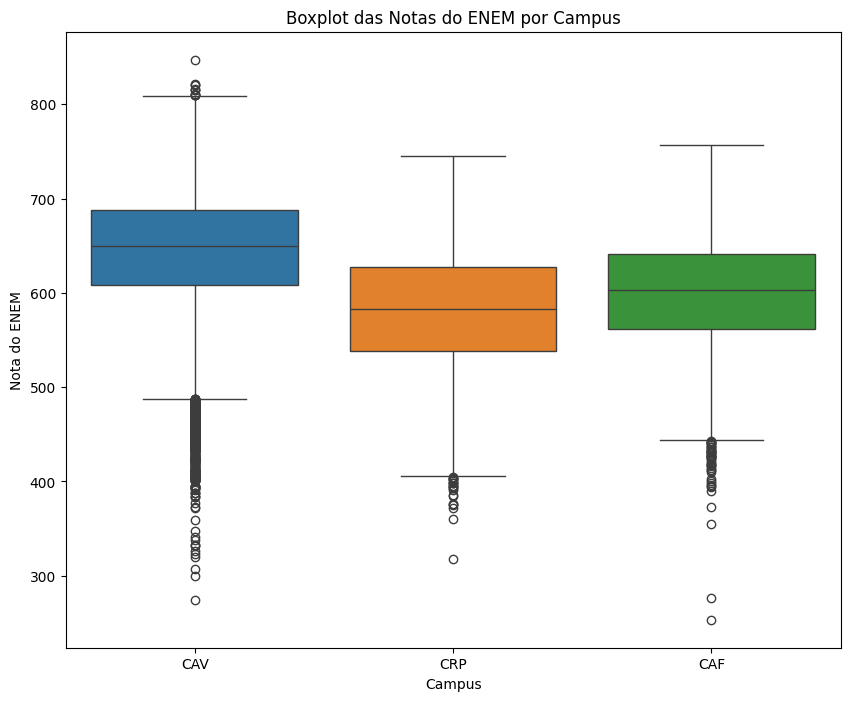

In [53]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='Campus', y='ENEM', data=df_enem, hue="Campus")

plt.title('Boxplot das Notas do ENEM por Campus')
plt.xlabel("Campus")
plt.ylabel('Nota do ENEM')

plt.show()




### kdeplot entre notas do ENEM e CRA (Campus Florestal)

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2058879423.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='ENEM', y='CRA', data=filtered_df, cmap='Blues', shade=True, thresh=0.05)


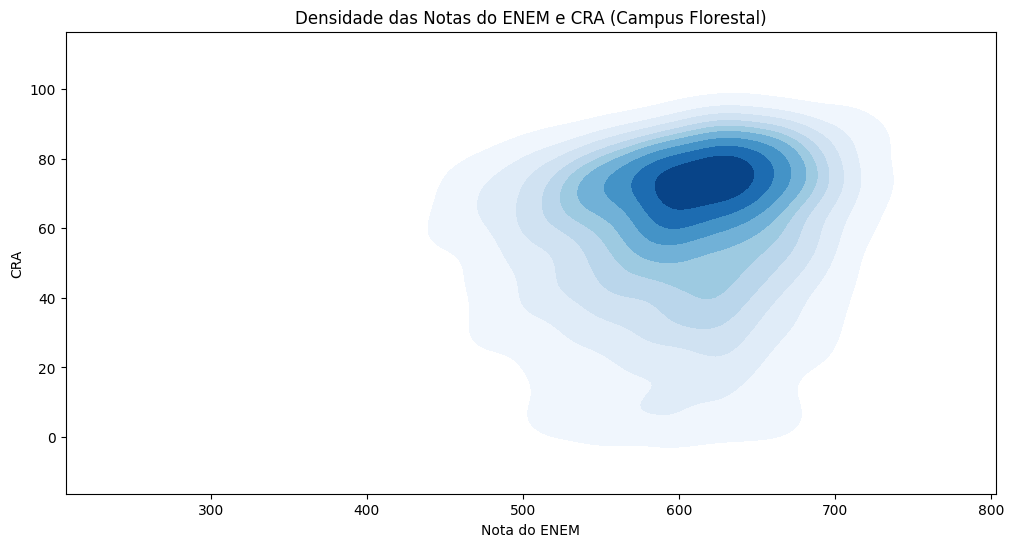

In [54]:
# Filtrar dados para o Campus Florestal e notas válidas de ENEM e CRA
filtered_df = df_enem[(df_enem['Campus'] == "CAF") & (df_enem['ENEM'] > 0) & (df_enem['CRA'] > 0)]

plt.figure(figsize=(12, 6))
sns.kdeplot(x='ENEM', y='CRA', data=filtered_df, cmap='Blues', shade=True, thresh=0.05)

plt.title('Densidade das Notas do ENEM e CRA (Campus Florestal)')
plt.xlabel('Nota do ENEM')
plt.ylabel('CRA')
plt.show()

### Kdeplot entre Num_Reprovacoes e CRA

In [55]:
# # KDE Plot entre Num_Reprovacoes e CRA
# plt.figure(figsize=(8, 6))
# sns.kdeplot(
#     x='Num_Reprovacoes',
#     y='CRA',
#     data=df[(df['Num_Reprovacoes'] >= 0) & (df['Num_Reprovacoes'] < 30) & (df['CRA'] > 0)],
#     cmap='Blues',
#     shade=True,
#     thresh=0.05
# )
# plt.title('Densidade entre Número de Reprovações e CRA')
# plt.xlabel('Número de Reprovações')
# plt.ylabel('CRA')
# plt.show()

### Box Plot entre Num_Reprovacoes e CRA

#### Agrupados em grupos de 3 para facilitar a visualização

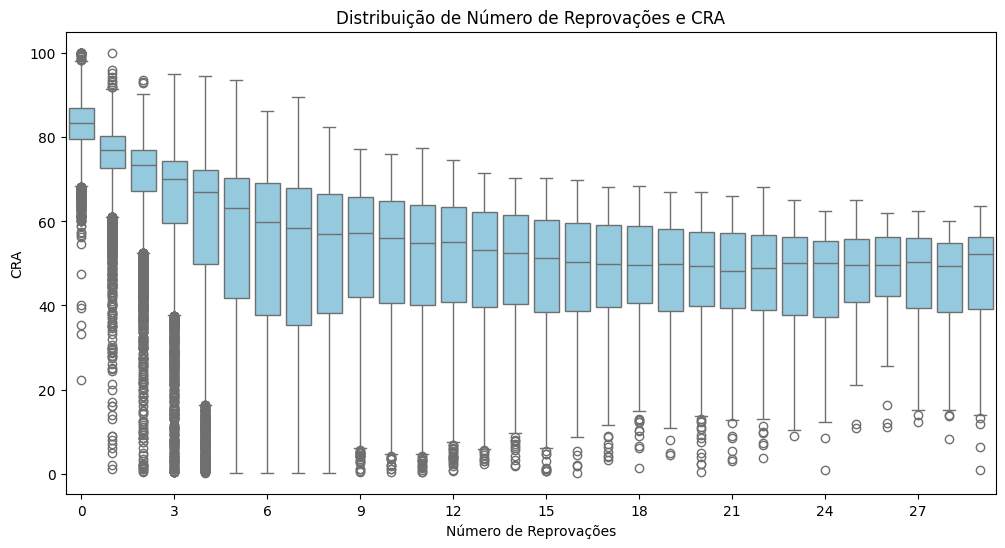

In [56]:
# Box Plot entre Num_Reprovacoes e CRA
plt.figure(figsize=(12, 6))
x_ticks = np.arange(0, 30.0, 3)
sns.boxplot(
    x='Num_Reprovacoes',
    y='CRA',
    data=df[(df['Num_Reprovacoes'] < 30) & (df['CRA'] > 0)],
    color='skyblue'
)
plt.title('Distribuição de Número de Reprovações e CRA')
plt.xlabel('Número de Reprovações')
plt.xticks(x_ticks)

plt.ylabel('CRA')
plt.show()

### Barplot de comparação entre CRAs de mesmo curso em campus diferentes

<Axes: xlabel='Curso', ylabel='CRA'>

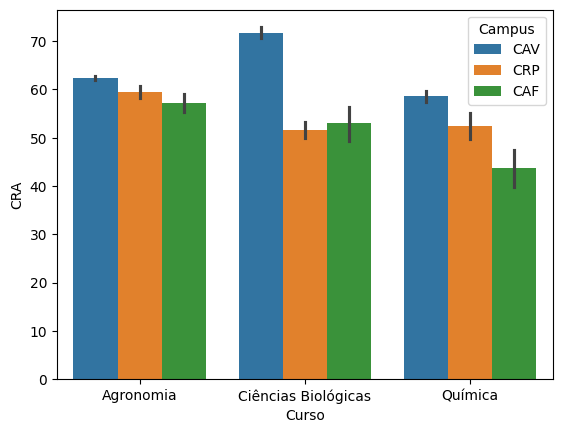

In [57]:
#Barplot de comparação entre CRAs de mesmo curso em campus diferentes
# Selecionar os 10 cursos com o maior número de instâncias que estão em todos os campi
#No entanto, os três campus só têm 3 cursos em comum: Agronomia, Ciência Biológicas e Química
campi = df['Campus'].unique()
cursos_em_todos_campus = df.groupby('Curso')['Campus'].nunique()
cursos_em_todos_campus = cursos_em_todos_campus[cursos_em_todos_campus == len(campi)].index
filtered_data = df[df['Curso'].isin(cursos_em_todos_campus)]

course_counts = filtered_data['Curso'].value_counts()

maiores_cursos = course_counts.nlargest(10).index
filtered_data = filtered_data[filtered_data['Curso'].isin(maiores_cursos)]

sns.barplot(filtered_data, x="Curso", y="CRA",hue='Campus')


### Barplot de comparação de CRA entre os três campus e a Situação Geral dos Alunos (Evasão/Conclusão/etc)

([0, 1, 2, 3],
 [Text(0, 0, 'Evasão'),
  Text(1, 0, 'Conclusão'),
  Text(2, 0, 'Retenção'),
  Text(3, 0, 'Matriculado')])

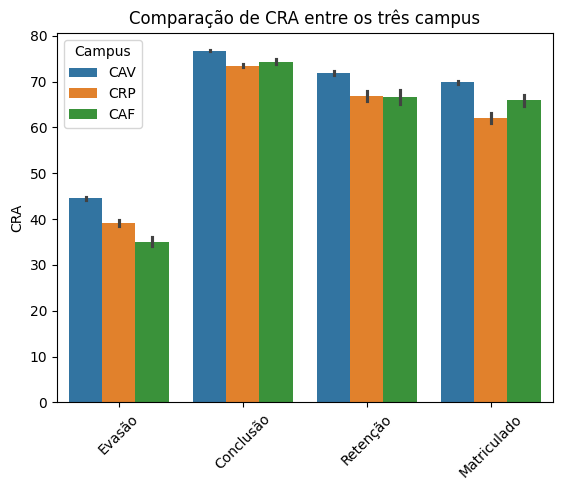

In [58]:
#comparação entre CRA geral entre os três campus e a Situação Geral dos Alunos (Evasão/Conclusão/etc)

sns.barplot(df, x="Situacao_Aluno_Agrupada", y="CRA",hue='Campus')
plt.xlabel("")
plt.title("Comparação de CRA entre os três campus")
plt.xticks(rotation=45)

### Barplot de comparação de CRA entre os três campus e o sexo dos alunos

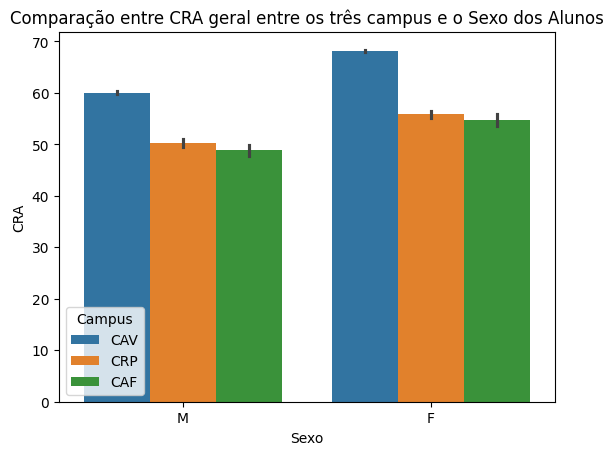

In [59]:
#comparação entre CRA geral entre os três campus e o Sexo dos Alunos
sns.barplot(df, x="Sexo", y="CRA",hue='Campus')
plt.title("Comparação entre CRA geral entre os três campus e o Sexo dos Alunos")

plt.show()

### Boxplot de comparação entre número de reprovações geral e a situação do aluno

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\35239345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isEvaded['PeriodoSaida'] = df_isEvaded.apply(lambda row: calcular_periodo(row['Admissao'], row['Saida'], row['Periodo_Saida_Ano']), axis=1)


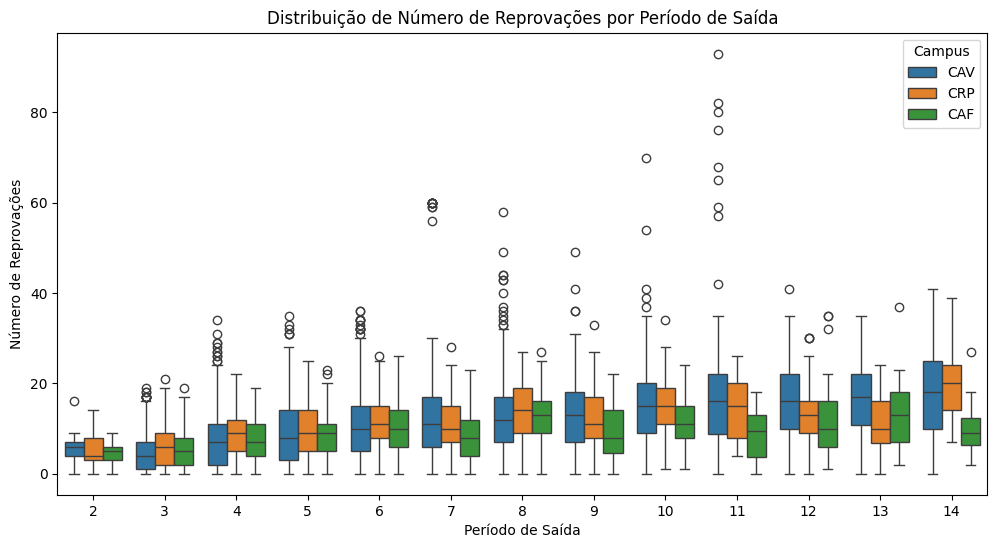

In [60]:
#Retiramos o período de saída da coluna "Saída", que possui um valor após '/' que corresponde à esse período
#Usamos como 'hue' esse período de saída
#Calcular com base no ano de saida e entrada, o periodo atual do aluno, caso o periodo de saida esteja como 0, entenda que o aluno está no curso

df_isEvaded = df[(df['Situacao_Aluno_Agrupada'] == 'Evasão') & (df['Saida'] != '0') & (df['Admissao'] < df['Saida'])]
df_isEvaded['PeriodoSaida'] = df_isEvaded.apply(lambda row: calcular_periodo(row['Admissao'], row['Saida'], row['Periodo_Saida_Ano']), axis=1)

period_counts = df_isEvaded['PeriodoSaida'].value_counts()
valid_periods = period_counts[period_counts > 100].index

df_isEvaded = df_isEvaded[df_isEvaded['PeriodoSaida'].isin(valid_periods)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_isEvaded, x='PeriodoSaida', y='Num_Reprovacoes', hue='Campus')
plt.title('Distribuição de Número de Reprovações por Período de Saída')
plt.xlabel('Período de Saída')
plt.ylabel('Número de Reprovações')
plt.legend(title='Campus')
plt.show()



## Respondendo Perguntas

### 1. Como a nota do ENEM se correlaciona na evasão dos estudantes?


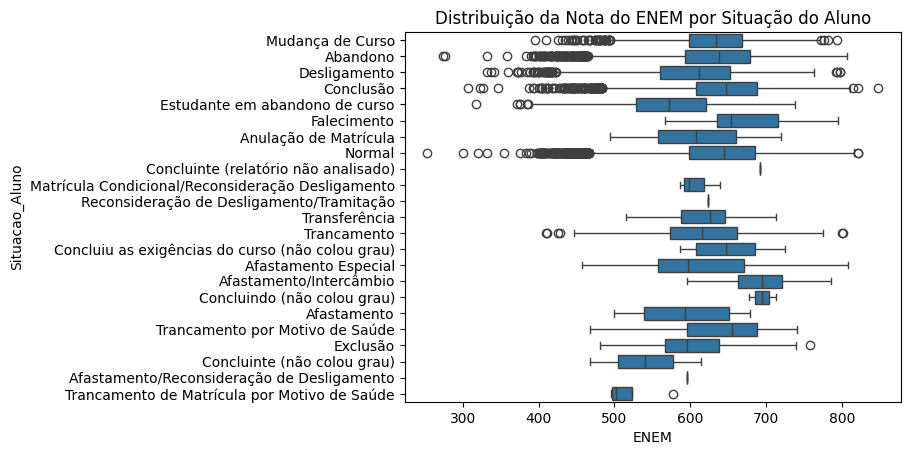

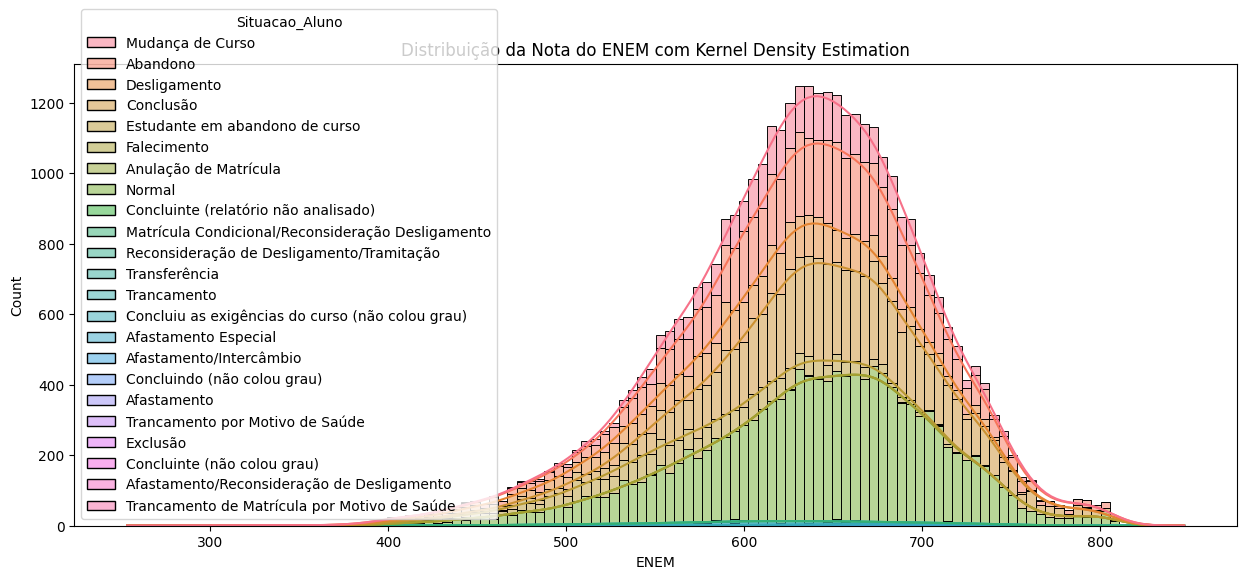

In [62]:
sns.boxplot(x='ENEM', y='Situacao_Aluno', data=df_enem)
plt.title('Distribuição da Nota do ENEM por Situação do Aluno')
plt.show()

plt.figure(figsize=(15, 6))
sns.histplot(data=df_enem, x='ENEM', hue='Situacao_Aluno', multiple='stack', kde=True)
plt.title('Distribuição da Nota do ENEM com Kernel Density Estimation')
plt.show()

### O valor t estatístico de -11.37 indica uma diferença substancial entre as médias das notas do ENEM dos alunos que abandonaram e os que concluíram. O sinal negativo sugere que a média das notas do grupo de abandono é menor do que a do grupo de conclusão.
### O valor p de 7.71e-30 é extremamente pequeno, muito abaixo do nível de significância comum de 0.05. Isso significa que há uma evidência muito forte para rejeitar a hipótese nula, que afirmaria que não há diferença nas médias das notas do ENEM entre os dois grupos.

### isso sugere que os alunos que abandonam tendem a ter notas do ENEM significativamente mais baixas do que aqueles que concluem.

In [63]:
from scipy.stats import ttest_ind

notas_abandono = df_enem[df_enem['Situacao_Aluno'] == 'Abandono']['ENEM']
notas_conclusao = df_enem[df_enem['Situacao_Aluno'] == 'Conclusão']['ENEM']
t_stat, p_value = ttest_ind(notas_abandono, notas_conclusao)
print(f'T estatístico: {t_stat}, Valor p: {p_value}')

T estatístico: -11.371160639839376, Valor p: 7.707464645388186e-30


### 2. Quais períodos que mais possuem abandono?

### Como é possível ver nos gráficos abaixo os períodos iniciais são os que apresentam maior índice de evasão.

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2353699330.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isEvaded['PeriodoSaidaTotal'] = df_isEvaded.apply(lambda row: calcular_periodo(row['Admissao'], row['Saida'], row['Periodo_Saida_Ano']), axis=1)


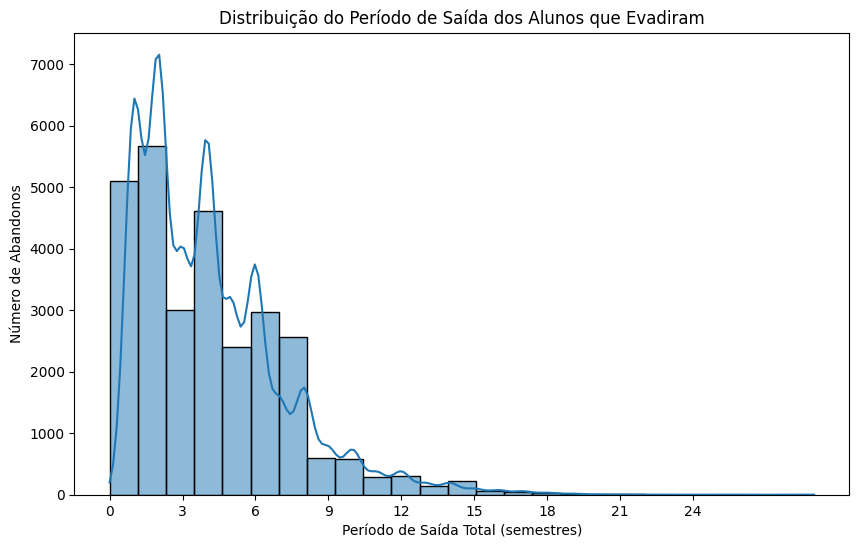

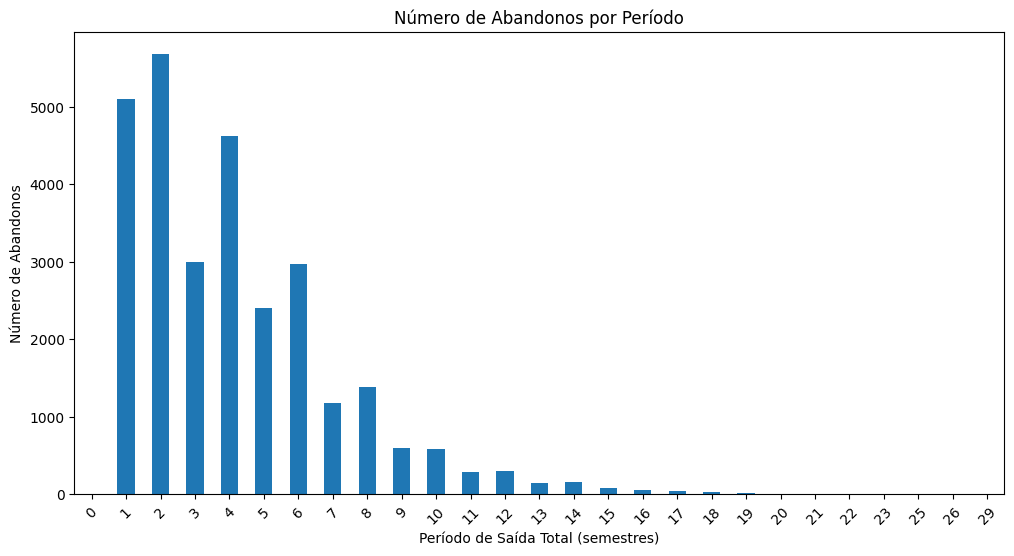

In [64]:
# Criando a coluna que o aluno saiu do curso
# Essa saída é calculada com base no ano de entrada e saída do aluno

df_isEvaded = df[(df['Situacao_Aluno_Agrupada'] == 'Evasão') & 
                 (df['Saida'] != '0') & 
                 (df['Admissao'] <= df['Saida'])]


df_isEvaded['PeriodoSaidaTotal'] = df_isEvaded.apply(lambda row: calcular_periodo(row['Admissao'], row['Saida'], row['Periodo_Saida_Ano']), axis=1)


plt.figure(figsize=(10, 6))
sns.histplot(data=df_isEvaded, x='PeriodoSaidaTotal', bins=25, kde=True)
plt.title('Distribuição do Período de Saída dos Alunos que Evadiram')
plt.xlabel('Período de Saída Total (semestres)')
plt.ylabel('Número de Abandonos')
plt.xticks(range(0, 25, 3)) 
plt.show()

abandonos_por_periodo = df_isEvaded['PeriodoSaidaTotal'].value_counts().sort_index()

abandonos_por_periodo.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Abandonos por Período')
plt.xlabel('Período de Saída Total (semestres)')
plt.ylabel('Número de Abandonos')
plt.xticks(rotation=45)
plt.show()


-------------------------------------------------------------------------------------

### 3. Quais cursos apresentam as maiores proporções de abandono?

#### Os cursos como "Licenciatura Em Matemática - EAD" e "Licenciatura Em Física" apresentam proporções de evasão superiores a 86%, o que indica um problema significativo de retenção nesses cursos. "Ciências Econômicas - Ênfase Em Agronegócio" tem a menor proporção de evasão entre os cursos listados, com cerca de 61,67%.

#### Cursos EAD vs. Presenciais
#### Com os dados é possível observar que licenciaturas EAD estão entre as com maior taxa de evasão. Isso pode refletir desafios específicos do ensino a distância, como falta de interação e suporte.

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\481985845.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=proporcao_df.index, x=proporcao_df['Proporcao_Evasoes'], palette='deep')


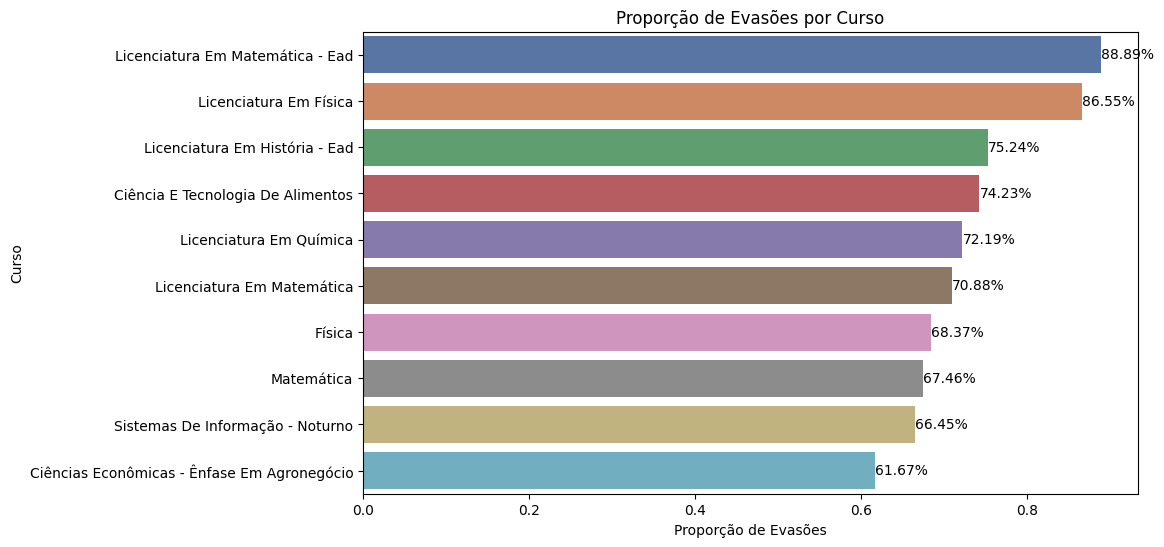

                                             Total_Alunos  Total_Evasoes  \
Curso                                                                      
Licenciatura Em Matemática - Ead                      243          216.0   
Licenciatura Em Física                                498          431.0   
Licenciatura Em História - Ead                        307          231.0   
Ciência E Tecnologia De Alimentos                     586          435.0   
Licenciatura Em Química                               773          558.0   
Licenciatura Em Matemática                            735          521.0   
Física                                               1331          910.0   
Matemática                                           1303          879.0   
Sistemas De Informação - Noturno                      754          501.0   
Ciências Econômicas - Ênfase Em Agronegócio           120           74.0   

                                             Proporcao_Evasoes  
Curso                 

In [65]:
total_alunos_por_curso = df.groupby('Curso').size()

total_evasoes_por_curso = df[df['Situacao_Aluno_Agrupada'] == 'Evasão'].groupby('Curso').size()

proporcao_evasoes_por_curso = total_evasoes_por_curso / total_alunos_por_curso

proporcao_df = pd.DataFrame({
    'Total_Alunos': total_alunos_por_curso,
    'Total_Evasoes': total_evasoes_por_curso,
    'Proporcao_Evasoes': proporcao_evasoes_por_curso
}).fillna(0)

proporcao_df = proporcao_df.sort_values(by='Proporcao_Evasoes', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=proporcao_df.index, x=proporcao_df['Proporcao_Evasoes'], palette='deep')
plt.title('Proporção de Evasões por Curso')
plt.ylabel('Curso')
plt.xlabel('Proporção de Evasões')

for index, value in enumerate(proporcao_df['Proporcao_Evasoes']):
    plt.text(value, index, f'{value:.2%}', va='center')

plt.show()

print(proporcao_df)

### 4. Como varia a taxa de abandono para o mesmo curso em diferentes campus?

#### Para Química A maior proporção de evasões ocorre no campus CAF (0,760), seguido por CRP (0,588) e CAV (0,459). Isso indica que o campus CAF enfrenta mais desafios em reter estudantes de Química.
#### Para Ciências Biológicas o campus CAF também apresenta a maior taxa de evasão (0,556), seguida de CRP (0,549) e CAV (0,287), sugerindo que as condições no campus CAF podem estar influenciando a evasão.
#### Para Agronomia as evasões são mais elevadas no campus CAF (0,413), com CRP (0,372) e CAV (0,298) apresentando taxas menores.

                 Curso Campus  Proporcao_Evasoes
0              Química    CAF           0.760369
1              Química    CRP           0.588406
2  Ciências Biológicas    CAF           0.556452
3  Ciências Biológicas    CRP           0.549770
4              Química    CAV           0.459494
5            Agronomia    CAF           0.413210
6            Agronomia    CRP           0.372168
7            Agronomia    CAV           0.298634
8  Ciências Biológicas    CAV           0.287394


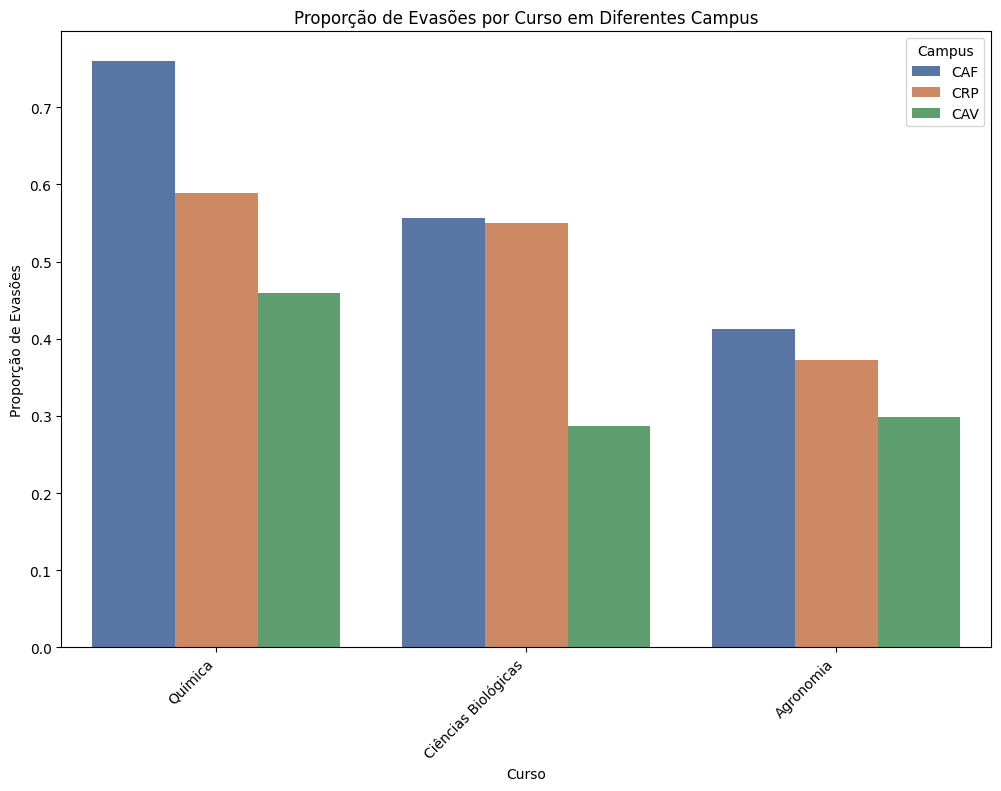

In [66]:

campus_por_campus = df.groupby('Curso')['Campus'].nunique()
cursos_nos_tres_campus = campus_por_campus[campus_por_campus == 3].index
df_filtrado = df[df['Curso'].isin(cursos_nos_tres_campus)]
total_alunos = df_filtrado.groupby(['Curso', 'Campus']).size()
total_evasoes_por_curso = df_filtrado[df_filtrado['Situacao_Aluno_Agrupada'] == 'Evasão'].groupby(['Curso', 'Campus']).size()
proporcao_evasoes_por_curso = total_evasoes_por_curso / total_alunos
proporcao_evasoes_por_curso = proporcao_evasoes_por_curso.sort_values(ascending=False).reset_index(name='Proporcao_Evasoes')

print(proporcao_evasoes_por_curso)

plt.figure(figsize=(12, 8))
sns.barplot(data=proporcao_evasoes_por_curso, x='Curso', y='Proporcao_Evasoes', hue='Campus', palette='deep')
plt.title('Proporção de Evasões por Curso em Diferentes Campus')
plt.ylabel('Proporção de Evasões')
plt.xlabel('Curso')

plt.xticks(rotation=45, ha='right')

plt.show()


### 5. Existe uma correlação entre o estado em que a pessoa veio e a taxa de conclusão dos estudantes?

#### Os resultados sugerem que o estado de origem dos alunos não é um fator determinante para a taxa de conclusão dos cursos na UFV. 
#### O coeficiente de correlação de Pearson encontrado é muito próximo de zero (-0.0022). o que indica praticamente nenhuma correlação linear entre o estado de origem dos estudantes e a taxa de conclusão. Além disso, o valor p é bastante elevado (0.5445), sugerindo que essa correlação não é estatisticamente significativa.

UF_Nascimento
AC    0.666667
ES    0.505339
RN    0.482759
GO    0.473477
MS    0.461538
PR    0.453925
AL    0.447368
RS    0.445312
SC    0.444444
SE    0.441860
BA    0.438822
SP    0.437510
MG    0.420495
DF    0.403553
PE    0.402299
RJ    0.397615
PB    0.387097
CE    0.385965
RO    0.379630
MT    0.361582
TO    0.350000
PA    0.344340
MA    0.280000
AM    0.264151
PI    0.235294
RR    0.230769
AP    0.217391
dtype: float64


C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2308364626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_conclusoes_por_estado.index, y=proporcao_conclusoes_por_estado.values, palette='viridis')


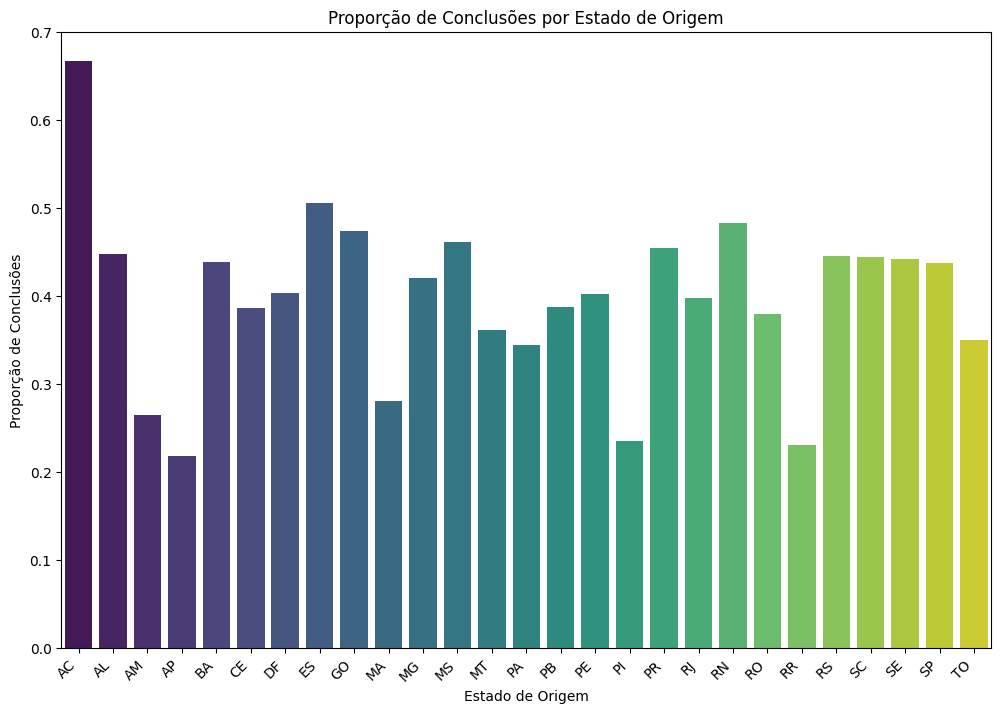

Coeficiente de correlação de Pearson: -0.0022298988899407362, Valor p: 0.5444915061889918


In [67]:
# Filtrando alunos que concluíram e total por estado
total_alunos_por_estado = df.groupby('UF_Nascimento').size()
total_conclusoes_por_estado = df[df['Situacao_Aluno'] == 'Conclusão'].groupby('UF_Nascimento').size()

proporcao_conclusoes_por_estado = total_conclusoes_por_estado / total_alunos_por_estado

print(proporcao_conclusoes_por_estado.sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.barplot(x=proporcao_conclusoes_por_estado.index, y=proporcao_conclusoes_por_estado.values, palette='viridis')
plt.title('Proporção de Conclusões por Estado de Origem')
plt.ylabel('Proporção de Conclusões')
plt.xlabel('Estado de Origem')
plt.xticks(rotation=45, ha='right')
plt.show()


df['Estado_Cod'] = df['UF_Nascimento'].astype('category').cat.codes

corr, p_value = pearsonr(df['Estado_Cod'], df['Situacao_Aluno'] == 'Conclusão')
print(f'Coeficiente de correlação de Pearson: {corr}, Valor p: {p_value}')


### 6. Como a idade de admissão dos alunos impacta a taxa de evasão? Há uma tendência de evasão mais elevada entre os alunos mais jovens ou mais velhos?

#### O resultado do teste ANOVA mostra uma estatística F muito alta (47.112,96) e um valor p igual a 0,0. Isso indica que há uma diferença estatisticamente significativa entre as faixas etárias em relação à taxa de evasão. Em outras palavras, a idade de admissão dos alunos tem um impacto significativo na probabilidade de evasão, e as diferenças entre as faixas etárias não são devido ao acaso.

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\308419357.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_alunos_por_faixa = df.groupby('Faixa_Etaria').size()
C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\308419357.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_evasoes_por_faixa = df[df['Situacao_Aluno_Agrupada'] == 'Evasão'].groupby('Faixa_Etaria').size()
C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\308419357.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

Faixa_Etaria
<18      0.364784
18-20    0.362676
21-24    0.391842
25-30    0.486152
31+      0.472601
dtype: float64


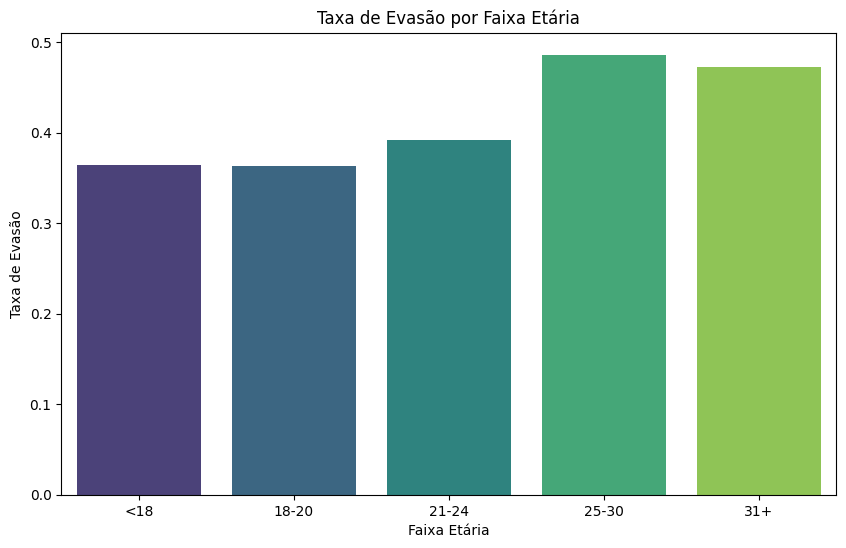

Estatística F: 47112.958690654996, Valor p: 0.0


In [68]:
# Garantir que a coluna 'Admissao' seja tratada como string
df['Admissao'] = df['Admissao'].astype(str)

df['Ano_Admissao'] = df['Admissao'].str[:4].astype(int)
df['Idade_Admissao'] = df['Ano_Admissao'] - df['Ano_Nascimento']

bins = [0, 18, 20, 24, 30, 100]
labels = ['<18', '18-20', '21-24', '25-30', '31+']
df['Faixa_Etaria'] = pd.cut(df['Idade_Admissao'], bins=bins, labels=labels)

total_alunos_por_faixa = df.groupby('Faixa_Etaria').size()
total_evasoes_por_faixa = df[df['Situacao_Aluno_Agrupada'] == 'Evasão'].groupby('Faixa_Etaria').size()

taxa_evasao_por_faixa = total_evasoes_por_faixa / total_alunos_por_faixa

print(taxa_evasao_por_faixa)

plt.figure(figsize=(10, 6))
sns.barplot(x=taxa_evasao_por_faixa.index, y=taxa_evasao_por_faixa.values, palette='viridis')
plt.title('Taxa de Evasão por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Evasão')
plt.show()

grupos_idade = [df[(df['Faixa_Etaria'] == faixa) & (df['Situacao_Aluno_Agrupada'] == 'Evasão')]['Idade_Admissao'] for faixa in labels]

f_stat, p_value = f_oneway(*grupos_idade)
print(f'Estatística F: {f_stat}, Valor p: {p_value}')


### 7. Há correlação entre a modalidade de inscrição dos alunos (ampla concorrência, cotas sociais, cotas raciais) e a evasão?

#### O valor p extremamente baixo indica que há uma associação estatisticamente significativa entre a modalidade de inscrição e a evasão. Isso significa que a modalidade de inscrição dos alunos tem uma relação importante com a probabilidade de evasão.
#### Cotas Sociais (1) e Cotas PPI (5) apresentam as maiores taxas de evasão, acima de 44%.
#### Cotas Raciais (2) têm a menor taxa de evasão (20%), sugerindo que alunos inscritos nessa modalidade tendem a concluir mais os cursos.
#### Ampla Concorrência (0) tem uma taxa de evasão intermediária, cerca de 33.28%.
#### Esses resultados sugerem que a modalidade de inscrição é um fator relevante na evasão dos estudantes, com certas modalidades apresentando um risco maior de evasão.

Valor Chi-Quadrado: 743.210892208246, Valor p: 3.528149468187591e-154
Situacao_Aluno_Agrupada  False  True 
Modalidade_Inscrita                  
0                        21891  10920
1                         2716   2164
2                           24      6
3                         2015   1326
4                           38     16
5                         2557   2065
6                           28     17
7                         2023   1252
8                           52     34
9                        10977   8480
Modalidade_Inscrita
0    0.332815
1    0.443443
2    0.200000
3    0.396887
4    0.296296
5    0.446776
6    0.377778
7    0.382290
8    0.395349
9    0.435833
dtype: float64


C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\1948288617.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao_por_modalidade.index, y=taxa_evasao_por_modalidade.values, palette='magma')


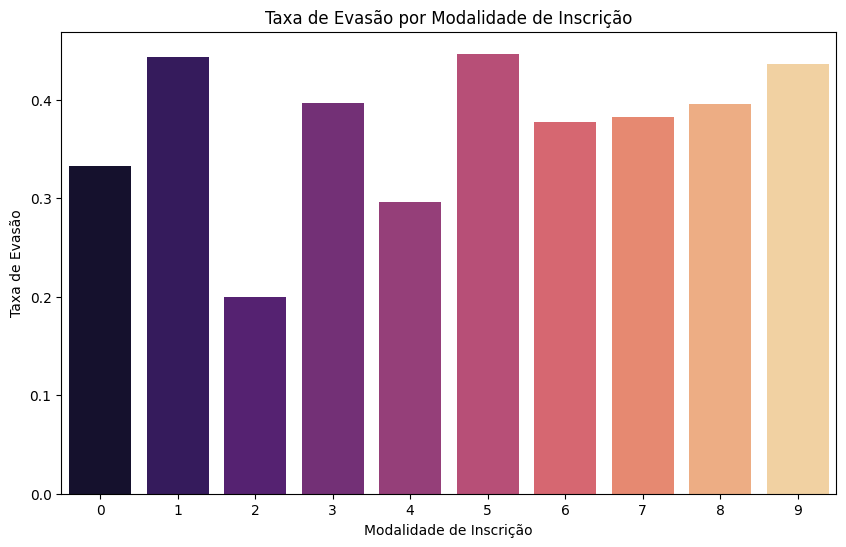

In [69]:
contingency_table = pd.crosstab(df['Modalidade_Inscrita'], df['Situacao_Aluno_Agrupada'] == 'Evasão')

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Valor Chi-Quadrado: {chi2}, Valor p: {p_value}")

print(contingency_table)

total_alunos_por_modalidade = df.groupby('Modalidade_Inscrita').size()

total_evasoes_por_modalidade = df[df['Situacao_Aluno_Agrupada'] == 'Evasão'].groupby('Modalidade_Inscrita').size()

taxa_evasao_por_modalidade = total_evasoes_por_modalidade / total_alunos_por_modalidade

print(taxa_evasao_por_modalidade)

plt.figure(figsize=(10, 6))
sns.barplot(x=taxa_evasao_por_modalidade.index, y=taxa_evasao_por_modalidade.values, palette='magma')
plt.title('Taxa de Evasão por Modalidade de Inscrição')
plt.xlabel('Modalidade de Inscrição')
plt.ylabel('Taxa de Evasão')
plt.show()


### 8. Existe relação entre o número de reprovações e a probabilidade de evasão dos alunos?

#### Valor Chi-Quadrado: 4719.05: Este valor indica uma associação significativa entre o número de reprovações e a situação do aluno (evasão ou conclusão).
#### Valor p: 0.0: Um valor p próximo de zero sugere que a associação é estatisticamente significativa. Portanto, podemos concluir que há uma relação entre o número de reprovações e a evasão dos alunos. Isso significa que o aumento nas reprovações está associado a uma maior taxa de evasão.
#### Coeficiente de Correlação de Pearson: 0.325: Esse valor indica uma correlação positiva moderada entre o número de reprovações e a taxa de evasão. Em outras palavras, à medida que o número de reprovações aumenta, a probabilidade de evasão também tende a aumentar, embora não seja uma relação extremamente forte.
#### Com essas análises, você pode concluir que existe uma relação positiva entre o número de reprovações e a evasão dos alunos. Aumentos no número de reprovações parecem estar associados a um aumento nas taxas de evasão.

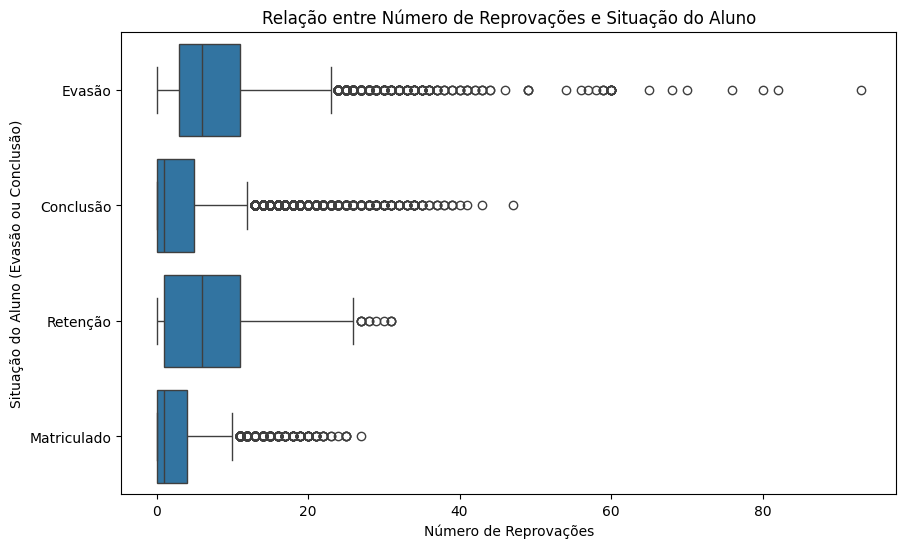

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\1214248547.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_alunos_por_faixa = df.groupby('Faixa_Reprovacoes').size()
C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\1214248547.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_evasoes_por_faixa = df[df['Situacao_Aluno_Agrupada'] == 'Evasão'].groupby('Faixa_Reprovacoes').size()
C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\1214248547.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

Faixa_Reprovacoes
0     0.201018
1     0.264524
2     0.367785
3     0.464403
4     0.574920
5+    0.593906
dtype: float64


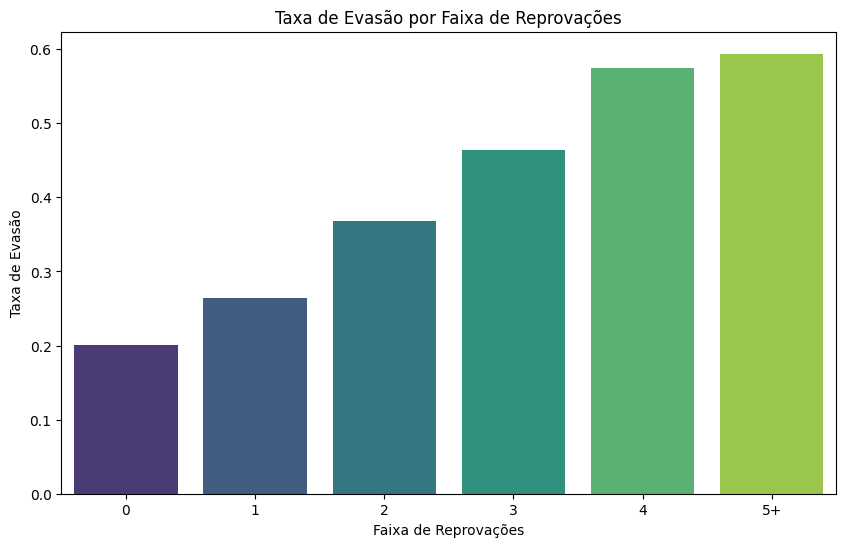

Valor Chi-Quadrado: 4719.0537740360405, Valor p: 0.0
Coeficiente de Correlação de Pearson: 0.3250450204997336


In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Reprovacoes', y='Situacao_Aluno_Agrupada', data=df)
plt.title('Relação entre Número de Reprovações e Situação do Aluno')
plt.xlabel('Número de Reprovações')
plt.ylabel('Situação do Aluno (Evasão ou Conclusão)')
plt.show()

bins = [0, 1, 2, 3, 4, 5, 10] 
labels = ['0', '1', '2', '3', '4', '5+']
df['Faixa_Reprovacoes'] = pd.cut(df['Num_Reprovacoes'], bins=bins, labels=labels)

total_alunos_por_faixa = df.groupby('Faixa_Reprovacoes').size()
total_evasoes_por_faixa = df[df['Situacao_Aluno_Agrupada'] == 'Evasão'].groupby('Faixa_Reprovacoes').size()

taxa_evasao_por_faixa = total_evasoes_por_faixa / total_alunos_por_faixa

print(taxa_evasao_por_faixa)

plt.figure(figsize=(10, 6))
sns.barplot(x=taxa_evasao_por_faixa.index, y=taxa_evasao_por_faixa.values, palette='viridis')
plt.title('Taxa de Evasão por Faixa de Reprovações')
plt.xlabel('Faixa de Reprovações')
plt.ylabel('Taxa de Evasão')
plt.show()

contingencia = pd.crosstab(df['Faixa_Reprovacoes'], df['Situacao_Aluno_Agrupada'])
chi2, p, _, _ = chi2_contingency(contingencia)
print(f'Valor Chi-Quadrado: {chi2}, Valor p: {p}')

df['Evasao'] = df['Situacao_Aluno_Agrupada'] == 'Evasão'
correlacao = df['Num_Reprovacoes'].corr(df['Evasao'].astype(int))
print(f'Coeficiente de Correlação de Pearson: {correlacao}')


### 9. Há diferença significativa na evasão entre os sexos? E entre diferentes campus da UFV?

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\1996256159.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=proporcao_evasoes_sexo.index,x=proporcao_evasoes_sexo.values, palette='deep')


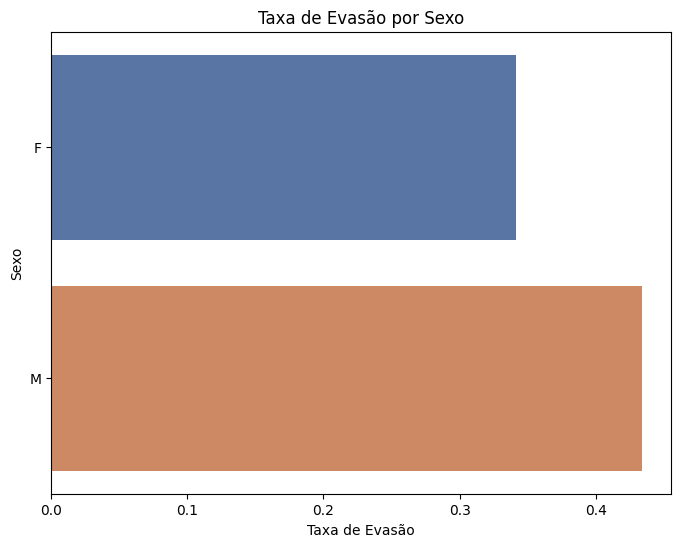

In [71]:
total_sexo = df.groupby('Sexo').size()
total_evasoes_sexo = df[df['Situacao_Aluno_Agrupada'] == "Evasão"].groupby('Sexo').size()

proporcao_evasoes_sexo = total_evasoes_sexo / total_sexo

plt.figure(figsize=(8, 6))
sns.barplot(y=proporcao_evasoes_sexo.index,x=proporcao_evasoes_sexo.values, palette='deep')
plt.title('Taxa de Evasão por Sexo')
plt.ylabel('Sexo')
plt.xlabel('Taxa de Evasão')
plt.show()


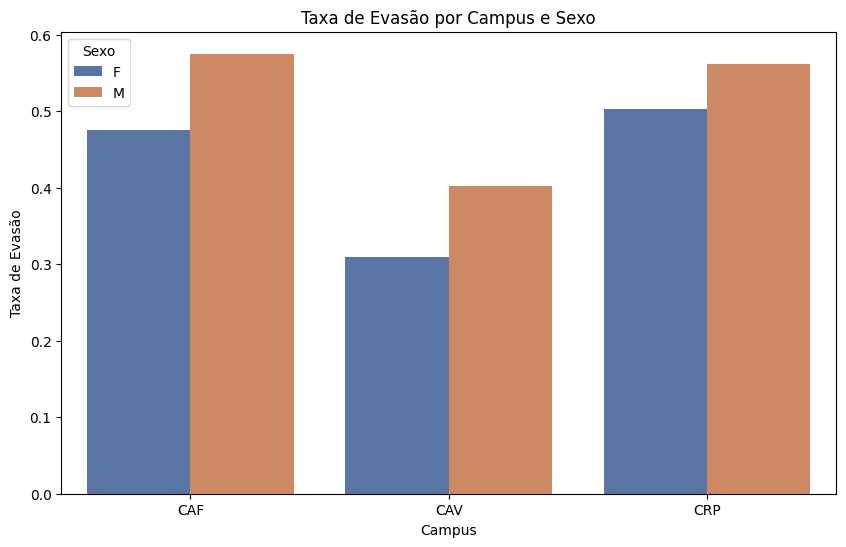

In [72]:
# Calcular o número total de alunos por campus e sexo
total_alunos_campus_sexo = df.groupby(['Campus', 'Sexo']).size().reset_index(name='Total_Alunos')

# Calcular o número total de evasões por campus e sexo
total_evasoes_campus_sexo = df[df['Situacao_Aluno_Agrupada'] == 'Evasão'].groupby(['Campus', 'Sexo']).size().reset_index(name='Total_Evasoes')

merged_totals = pd.merge(total_alunos_campus_sexo, total_evasoes_campus_sexo, on=['Campus', 'Sexo'], how='left').fillna(0)

merged_totals['Taxa_de_Evasao'] = merged_totals['Total_Evasoes'] / merged_totals['Total_Alunos']

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_totals, x='Campus', y='Taxa_de_Evasao', palette='deep', hue='Sexo')
plt.title('Taxa de Evasão por Campus e Sexo')
plt.xlabel('Campus')
plt.ylabel('Taxa de Evasão')
plt.show()


## Tentando encontrar correlações relevantes entre as colunas com df.corr()

In [73]:
numeric_df = df.select_dtypes(include=['number']) ##Somente queremos analisar colunas numéricas
correlacoes=  numeric_df.corr()
dataset_correlacoes = correlacoes.copy()

dataset_correlacoes.describe()

Identificador  Ano_Nascimento  Curso_Identificador      Saida  \
count      12.000000       12.000000            12.000000  12.000000   
mean        0.176417        0.102375             0.174953   0.027746   
std         0.423538        0.486030             0.419952   0.454203   
min        -0.377874       -0.678087            -0.373677  -0.560517   
25%        -0.040266       -0.144189            -0.031588  -0.185830   
50%         0.039702        0.067870             0.051213  -0.030226   
75%         0.246976        0.266191             0.225824   0.083559   
max         1.000000        1.000000             1.000000   1.000000   

       Modalidade_Inscrita       ENEM  Num_Reprovacoes        CRA  \
count            12.000000  12.000000        12.000000  12.000000   
mean              0.189571   0.036482         0.060814  -0.011373   
std               0.393308   0.368483         0.330954   0.357529   
min              -0.327681  -0.377874        -0.430774  -0.430774   
25%              -0.061698  -0.158454        -0.036334  -0.174012   
50%               0.121856  -0.037555        -0.000936  -0.098093   
75%               0.369587   0.174160         0.087289  -0.002874   
max               1.000000   1.000000         1.000000   1.000000   

       Periodo_Saida_Ano  Estado_Cod  Ano_Admissao  Idade_Admissao  
count          12.000000   12.000000     12.000000       12.000000  
mean            0.056285    0.082549      0.125972       -0.005167  
std             0.418963    0.289361      0.471152        0.371757  
min            -0.428847   -0.021336     -0.560517       -0.678087  
25%            -0.109031   -0.007544     -0.087876       -0.060777  
50%            -0.028673   -0.002245     -0.020070       -0.027909  
75%             0.019311    0.005605      0.328146       -0.000210  
max             1.000000    1.000000      1.000000        1.000000

### Há tanto relações inversamente e diretamente proporcionais, podemos ver isso pelo sinal do valor da correlação, caso uma coluna seja inversamente relacionada à outra, o valor entre as duas será negativo, caso contrário, positivo.

### As correlações com o valor 1 só são possíveis pois são correlações que ocorrem entre as mesmas colunas. Correlações com o valor zero são improváveis, mas podem tender à zero quando duas colunas não possuem relações entre si.

### Porém os segundos maiores valores são de fato as maiores correlações entre diferentes colunas, podemos extrair esses valores com uma função que retorna o segundo maior valor de uma coluna e com um apply no dataset "dataset_correlacoes" inteiro.

In [74]:
def segundo_maior_correlacao(corr_df, coluna):
    # Calcula a  maior correlação para cada coluna (exceto com a própria coluna)
    nmaiores = corr_df[coluna].drop(coluna).nlargest(2)

    if len(nmaiores) < 2:
        return pd.Series([None, None], index=['Coluna_Maior_Valor', 'Maior_Correlacao'])

    maior_correlacao = nmaiores.iloc[0]
    coluna_maior_correlacao = nmaiores.index[0] #Coluna da maior correlação

    return pd.Series([coluna_maior_correlacao, maior_correlacao], index=['Coluna_Maior_Valor', 'Maior_Correlacao'])

# Aplica a função a cada coluna do DataFrame
resultados = {coluna: segundo_maior_correlacao(correlacoes, coluna) for coluna in correlacoes.columns}
resultados_df = pd.DataFrame(resultados).T  #Transpor a matriz resultante

print(resultados_df)

                      Coluna_Maior_Valor Maior_Correlacao
Identificador        Curso_Identificador         0.989381
Ano_Nascimento              Ano_Admissao         0.768441
Curso_Identificador        Identificador         0.989381
Saida                  Periodo_Saida_Ano         0.773358
Modalidade_Inscrita         Ano_Admissao         0.638573
ENEM                                 CRA         0.271378
Num_Reprovacoes                    Saida         0.131887
CRA                                 ENEM         0.271378
Periodo_Saida_Ano                  Saida         0.773358
Estado_Cod                          ENEM         0.040896
Ano_Admissao              Ano_Nascimento         0.768441
Idade_Admissao                     Saida          0.06745


### É possível observar certos valores que se repetem entre colunas. Por exemplo, Identificador e Curso_Identificador possuem correlações similares, isso se dá pelo fato de que funcionam de formas simulares. Mesmo que os valores se diferem entre si, Curso_Identificador sempre terá o mesmo valor "a" se Identificador tiver um valor "b", por exemplo.


### Valores de correlação como a Idade e o Período de Saída se mostram grandes porém não são relevantes e não podem ser bem explicados.



### Valores Interessantes podem ser observados, como ENEM tendo uma grande correlação com a Modalidade_Inscrita, que nesse caso é um número contendo o valor da modalidade.

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2305896646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enem['Modalidade_Inscrita_str'] = df_enem['Modalidade_Inscrita'].astype(str)
C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2305896646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_enem, x='Modalidade_Inscrita_str', y='ENEM', order=modalidades_ordenadas, palette='viridis')


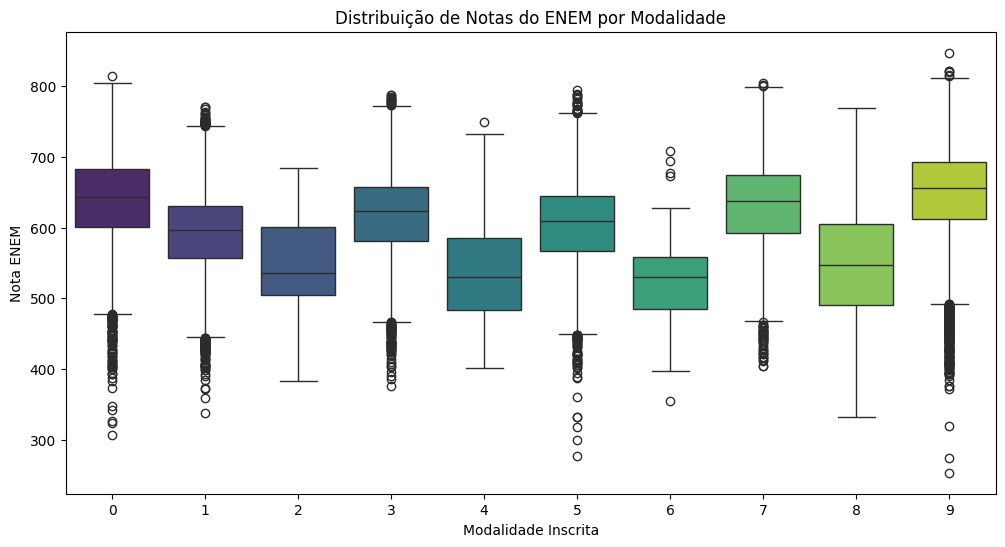

In [75]:
df_enem['Modalidade_Inscrita_str'] = df_enem['Modalidade_Inscrita'].astype(str)

modalidades_ordenadas = sorted(df_enem['Modalidade_Inscrita_str'].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_enem, x='Modalidade_Inscrita_str', y='ENEM', order=modalidades_ordenadas, palette='viridis')
plt.xlabel('Modalidade Inscrita')
plt.ylabel('Nota ENEM')
plt.title('Distribuição de Notas do ENEM por Modalidade')
plt.show()


### 10. Quais são as principais caracteristicas daqueles que evadem o curso? E daqueles que concluem?

####  A análise sugere que as principais características associadas à evasão incluem notas do ENEM mais baixas, maior idade de admissão, um número maior de reprovações e desigualdades raciais e socioeconômicas. Em contrapartida, alunos que concluem tendem a ter melhores desempenhos acadêmicos, menos reprovações e, em média, uma idade de admissão mais jovem.

In [176]:
notas_abandono = df[df['Situacao_Aluno_Agrupada'] == 'Evasão']['ENEM']
notas_conclusao = df[df['Situacao_Aluno_Agrupada'] == 'Conclusão']['ENEM']

media_abandono = notas_abandono.mean()
media_conclusao = notas_conclusao.mean()

print(f'Média das notas do ENEM (Evasão): {media_abandono}')
print(f'Média das notas do ENEM (Conclusão): {media_conclusao}')

idade_abandono = df[df['Situacao_Aluno_Agrupada'] == 'Evasão']['Idade_Admissao']
idade_conclusao = df[df['Situacao_Aluno_Agrupada'] == 'Conclusão']['Idade_Admissao']

media_idade_abandono = idade_abandono.mean()
media_idade_conclusao = idade_conclusao.mean()

print(f'Média da idade de admissão (Evasão): {media_idade_abandono}')
print(f'Média da idade de admissão (Conclusão): {media_idade_conclusao}')

distribuicao_modalidade = df.groupby(['Modalidade_Inscrita', 'Situacao_Aluno_Agrupada']).size().unstack().fillna(0)

reprovacoes_abandono = df[df['Situacao_Aluno_Agrupada'] == 'Evasão']['Num_Reprovacoes']
reprovacoes_conclusao = df[df['Situacao_Aluno_Agrupada'] == 'Conclusão']['Num_Reprovacoes']

distribuicao_modalidade

Média das notas do ENEM (Evasão): 615.9566572401454
Média das notas do ENEM (Conclusão): 642.9373986804901
Média da idade de admissão (Evasão): 22.021310043668123
Média da idade de admissão (Conclusão): 21.480801707931047


Situacao_Aluno_Agrupada  Conclusão   Evasão  Matriculado  Retenção
Modalidade_Inscrita                                               
0                          21175.0  10920.0        600.0     116.0
1                            850.0   2164.0       1443.0     423.0
2                              0.0      6.0         22.0       2.0
3                            522.0   1326.0       1241.0     252.0
4                              2.0     16.0         33.0       3.0
5                            826.0   2065.0       1393.0     338.0
6                              0.0     17.0         28.0       0.0
7                            541.0   1252.0       1276.0     206.0
8                              0.0     34.0         50.0       2.0
9                           4556.0   8480.0       5259.0    1162.0

In [177]:
media_reprovacoes_abandono = reprovacoes_abandono.mean()
media_reprovacoes_conclusao = reprovacoes_conclusao.mean()

print(f'Média de reprovações (Evasão): {media_reprovacoes_abandono}')
print(f'Média de reprovações (Conclusão): {media_reprovacoes_conclusao}')

caracteristicas_demos = df.groupby(['Raca', 'Sexo', 'Situacao_Aluno_Agrupada']).size().unstack().fillna(0)
caracteristicas_demos

Média de reprovações (Evasão): 7.403912663755459
Média de reprovações (Conclusão): 3.471178663607686


Situacao_Aluno_Agrupada         Conclusão  Evasão  Matriculado  Retenção
Raca                      Sexo                                          
Amarelo(a)                F           329     208           86        23
                          M           163     191           66        17
Branco(a)                 F          5870    4211         2622       498
                          M          4916    5538         2563       646
Indígena                  F            59      29            9         6
                          M            60      83           11         8
Informação não disponível F          7099    3733          487        20
                          M          5607    4784          570         1
Pardo(a)                  F          3120    3387         1993       495
                          M          2562    4161         1864       467
Preto(a)                  F           881    1053          587       173
                          M           717    1247          491       154

### Previsão da Evasão do estudante

In [77]:
df_enem['Evasao'] = df_enem['Situacao_Aluno_Agrupada'] == 'Evasão'
df_enem['Evasao'] = df_enem['Evasao'].astype(int)	

C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2544860150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enem['Evasao'] = df_enem['Situacao_Aluno_Agrupada'] == 'Evasão'
C:\Users\tarik\AppData\Local\Temp\ipykernel_9744\2544860150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enem['Evasao'] = df_enem['Evasao'].astype(int)


#### Analisando as correlações percebermos que a Evasão tem um forte correlação inversamente proprocial ao CRA e com base nas análises anteriores e agora a matriz de correlação reforça um correlação entre ano de nascimento e Evasão. E diretamente proporional a Evasão com boa correlação é o número de reprovações e a Evasão.

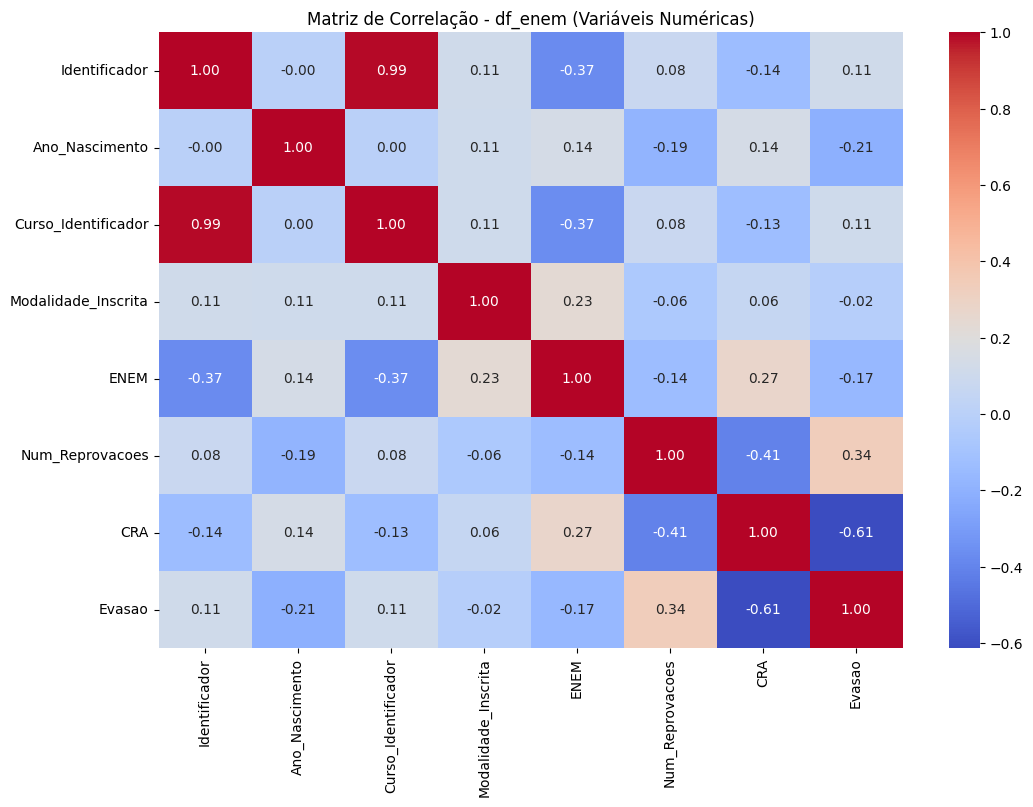

In [78]:

df_numeric = df_enem.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - df_enem (Variáveis Numéricas)')
plt.show()

In [79]:
print(df_enem.dtypes)

Identificador                int64
Ano_Nascimento               Int64
Sexo                        object
Campus                      object
Curso_Identificador          int64
Curso                       object
UF_Nascimento               object
Municipio_Nascimento        object
Admissao                    object
Saida                       object
Codigo_Situacao_Aluno       object
Situacao_Aluno              object
Situacao_Aluno_Agrupada     object
Modalidade_Inscrita          Int64
ENEM                       float64
Num_Reprovacoes              int64
Raca                        object
CRA                        float64
Modalidade_Inscrita_str     object
Evasao                       int32
dtype: object


In [80]:
print(df_enem.isnull().sum())
df_enem_clean = df_enem.dropna()

df_enem_clean = df_enem_clean.astype({'Identificador': 'int64', 
                                      'Ano_Nascimento': 'int64', 
                                      'Curso_Identificador': 'int64', 
                                      'Modalidade_Inscrita': 'int64'})

print(df_enem_clean.dtypes)


Identificador              0
Ano_Nascimento             0
Sexo                       0
Campus                     0
Curso_Identificador        0
Curso                      0
UF_Nascimento              0
Municipio_Nascimento       0
Admissao                   0
Saida                      0
Codigo_Situacao_Aluno      0
Situacao_Aluno             0
Situacao_Aluno_Agrupada    0
Modalidade_Inscrita        0
ENEM                       0
Num_Reprovacoes            0
Raca                       0
CRA                        0
Modalidade_Inscrita_str    0
Evasao                     0
dtype: int64
Identificador                int64
Ano_Nascimento               int64
Sexo                        object
Campus                      object
Curso_Identificador          int64
Curso                       object
UF_Nascimento               object
Municipio_Nascimento        object
Admissao                    object
Saida                       object
Codigo_Situacao_Aluno       object
Situacao_Aluno        

### Modelo de Regressão Linear

In [81]:
Y = df_enem_clean['Evasao']
X = df_enem_clean[['ENEM', 'Identificador', 'Ano_Nascimento', 'Curso_Identificador', 'CRA', 'Modalidade_Inscrita', 'Num_Reprovacoes']]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Evasao   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     3581.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:55:21   Log-Likelihood:                -17445.
No. Observations:               37716   AIC:                         3.491e+04
Df Residuals:                   37708   BIC:                         3.497e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.9393    

Identificador (VIF: 60.89): Este valor é muito alto, indicando que a variável "Identificador" pode ser colinear com outras variáveis.
Curso_Identificador (VIF: 60.68): Assim como o "Identificador", essa variável parece ter uma colinearidade significativa.
#### Variáveis com VIF aceitável:
ENEM (VIF: 1.35): Indica uma baixa colinearidade com outras variáveis, o que é desejável.
Ano_Nascimento (VIF: 1.06): Baixo VIF, sugerindo que essa variável é independente e relevante.
CRA (VIF: 1.28): Também é uma variável que apresenta baixa colinearidade.
Modalidade_Inscrita (VIF: 1.12): Indica baixa colinearidade.
Num_Reprovacoes (VIF: 1.23): Também apresenta um nível aceitável de colinearidade

In [82]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

               feature            VIF
0                const  130566.385315
1                 ENEM       1.350292
2        Identificador      60.890981
3       Ano_Nascimento       1.062464
4  Curso_Identificador      60.679141
5                  CRA       1.278022
6  Modalidade_Inscrita       1.118359
7      Num_Reprovacoes       1.228072


#### Refazendo o modelo de Regressão Linear percebe-se que o ENEM apresenta um valor p alto.

In [83]:
Y = df_enem_clean['Evasao']
X = df_enem_clean[['ENEM', 'Ano_Nascimento', 'CRA', 'Modalidade_Inscrita', 'Num_Reprovacoes']]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Evasao   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     4990.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:55:27   Log-Likelihood:                -17480.
No. Observations:               37716   AIC:                         3.497e+04
Df Residuals:                   37710   BIC:                         3.502e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.7778    

#### Com o R^2 de 0.398, o que significa que aproximadamente 39,8% da variabilidade na variável dependente (evasão), há uma quantidade significativa de variabilidade na evasão que não é explicada pelas variáveis atuais, então tentaremos outros métodos para tentar prever a Evasão.

In [84]:
Y = df_enem_clean['Evasao']
X = df_enem_clean[['Ano_Nascimento', 'CRA', 'Modalidade_Inscrita', 'Num_Reprovacoes']]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Evasao   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     6236.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:55:28   Log-Likelihood:                -17481.
No. Observations:               37716   AIC:                         3.497e+04
Df Residuals:                   37711   BIC:                         3.502e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.7100    

### Modelo de Regressão Logística

Usaremos as mesmas variáveis com VIF aceitável, como visto no último modelo. 

In [85]:
X = df_enem_clean[['ENEM', 'Ano_Nascimento', 'CRA', 'Modalidade_Inscrita', 'Num_Reprovacoes']]
X = sm.add_constant(X)  

Y = df_enem_clean['Evasao']

model = sm.Logit(Y, X).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.443186
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Evasao   No. Observations:                37716
Model:                          Logit   Df Residuals:                    37710
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.3528
Time:                        22:55:31   Log-Likelihood:                -16715.
converged:                       True   LL-Null:                       -25826.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 163.2902      5.342     30.567      0.000     152.820     173.760
EN

#### Percebe-se que Num_Reprovacoes apresenta um valor p alto. O removeremos  para calcular outra Regressão Logística

In [86]:
X = df_enem_clean[['ENEM', 'Ano_Nascimento', 'CRA', 'Modalidade_Inscrita']]
X = sm.add_constant(X) 

Y = df_enem_clean['Evasao']

model = sm.Logit(Y, X).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.443211
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Evasao   No. Observations:                37716
Model:                          Logit   Df Residuals:                    37711
Method:                           MLE   Df Model:                            4
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.3527
Time:                        22:55:34   Log-Likelihood:                -16716.
converged:                       True   LL-Null:                       -25826.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 164.6811      5.253     31.347      0.000     154.385     174.978
EN

In [87]:
X = df_enem_clean[['ENEM', 'Ano_Nascimento', 'CRA', 'Modalidade_Inscrita', 'Num_Reprovacoes']]
Y = df_enem_clean['Evasao']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Com um Pseudo R² de 0.3527, aproximadamente 35,3% da variabilidade na variável dependente (evasão) é explicada pelo modelo. Isso indica que há uma parte significativa da variabilidade na evasão que não é explicada pelas variáveis atuais. Portanto, exploraremos outros métodos para melhorar a previsão da evasão.

### Regressão Logística

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Regressão Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)
Y_pred_logistic = logistic_model.predict(X_test)

print("Acurácia - Regressão Logística:", accuracy_score(Y_test, Y_pred_logistic))
print("Relatório de Classificação - Regressão Logística:\n", classification_report(Y_test, Y_pred_logistic))


Acurácia - Regressão Logística: 0.8162615996464869
Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      6360
           1       0.84      0.71      0.77      4955

    accuracy                           0.82     11315
   macro avg       0.82      0.80      0.81     11315
weighted avg       0.82      0.82      0.81     11315



c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



A Regressão Logística apresenta uma acurácia de 81,6%, indicando eficácia na previsão da evasão dos alunos. O modelo possui uma precisão de 80% para a classe "não evasão" e 84% para a classe "evasão", significando que é bastante confiável em suas previsões. No entanto, a revocação é de 90% para "não evasão" e 71% para "evasão", o que sugere que o modelo identifica a maioria dos alunos que não evadem, mas ainda pode melhorar na detecção de todos os casos de evasão. O F1-Score, que equilibra precisão e revocação, é de 85% para "não evasão" e 77% para "evasão", refletindo um bom desempenho geral.

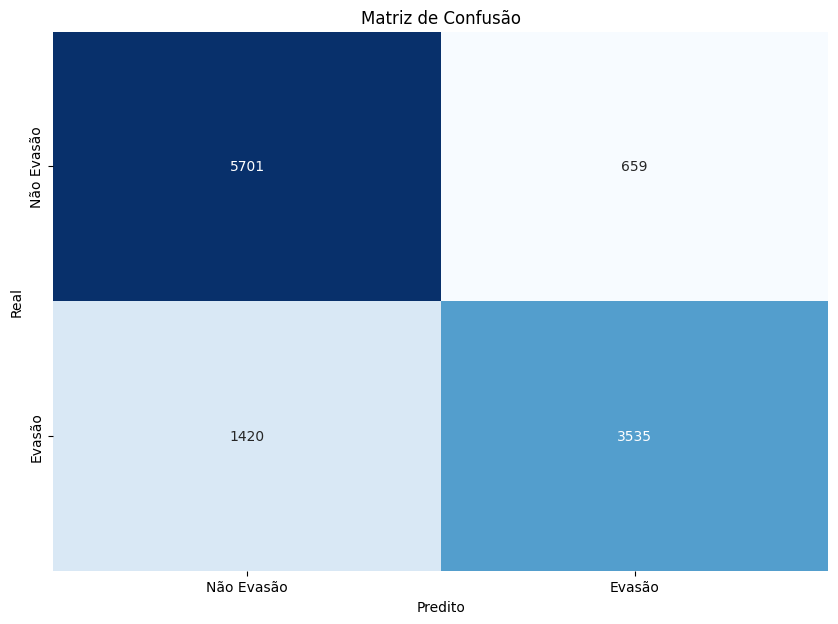

In [89]:
cm = confusion_matrix(Y_test, Y_pred_logistic)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Evasão', 'Evasão'], yticklabels=['Não Evasão', 'Evasão'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### KNN (K-Nearest Neighbors)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)

print("Acurácia - KNN:", accuracy_score(Y_test, Y_pred_knn))
print("Relatório de Classificação - KNN:\n", classification_report(Y_test, Y_pred_knn))


Acurácia - KNN: 0.8262483429076447
Relatório de Classificação - KNN:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      6360
           1       0.83      0.76      0.79      4955

    accuracy                           0.83     11315
   macro avg       0.83      0.82      0.82     11315
weighted avg       0.83      0.83      0.83     11315



A aplicação do modelo KNN (K-Nearest Neighbors) resultou em uma acurácia de 82,6%, indicando um desempenho ligeiramente superior ao da Regressão Logística na previsão da evasão dos alunos. O modelo apresentou uma precisão de 82% para a classe "não evasão" e 83% para a classe "evasão", mostrando uma confiabilidade equilibrada em suas previsões para ambas as classes. A revocação foi de 88% para "não evasão" e 76% para "evasão", sugerindo que o modelo é eficaz em identificar alunos que não evadem, mas ainda pode melhorar na detecção de todos os casos de evasão. O F1-Score foi de 85% para "não evasão" e 79% para "evasão", refletindo um bom equilíbrio entre precisão e revocação e um desempenho geral robusto.

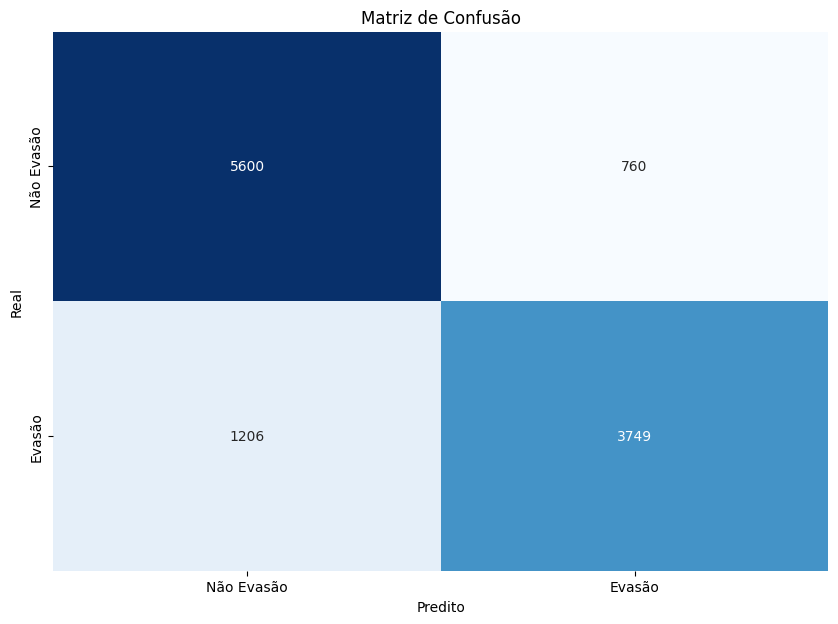

In [91]:
cm = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Evasão', 'Evasão'], yticklabels=['Não Evasão', 'Evasão'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, Y_train)
Y_pred_gb = gb_model.predict(X_test)

print("Acurácia - Gradient Boosting:", accuracy_score(Y_test, Y_pred_gb))
print("Relatório de Classificação - Gradient Boosting:\n", classification_report(Y_test, Y_pred_gb))


Acurácia - Gradient Boosting: 0.8497569597878922
Relatório de Classificação - Gradient Boosting:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      6360
           1       0.88      0.76      0.82      4955

    accuracy                           0.85     11315
   macro avg       0.86      0.84      0.84     11315
weighted avg       0.85      0.85      0.85     11315




O modelo de Gradient Boosting alcançou uma acurácia de 84,98%, que é o melhor desempenho entre os modelos testados. A precisão para a classe "não evasão" foi de 83%, enquanto para a classe "evasão" foi de 88%, indicando que o modelo é bastante eficaz em prever a evasão e a não evasão dos alunos. A revocação para a classe "não evasão" foi de 92%, e para a classe "evasão" foi de 76%, mostrando que o modelo é particularmente bom em identificar alunos que não evadem, embora ainda possa melhorar na detecção de todos os casos de evasão. O F1-Score foi de 87% para "não evasão" e 82% para "evasão", refletindo um bom equilíbrio entre precisão e revocação e um desempenho geral robusto.

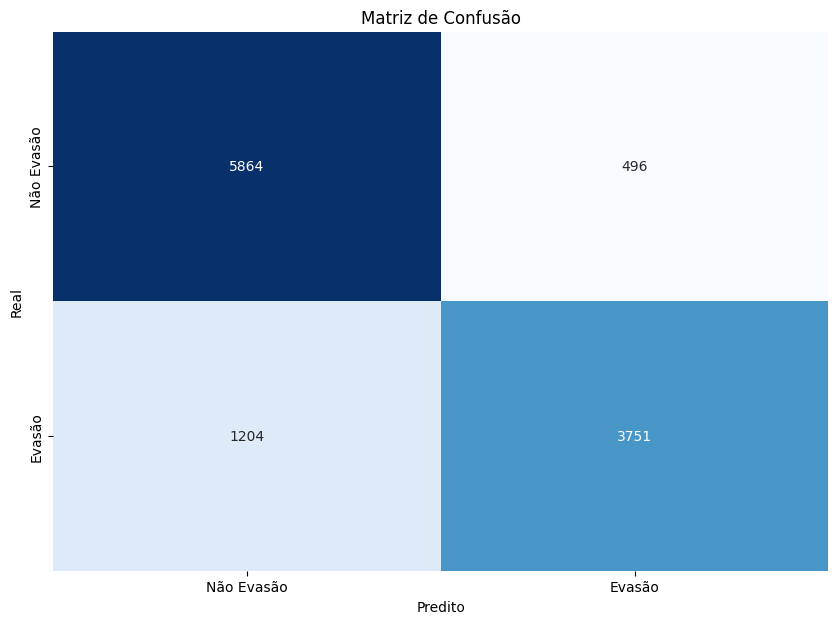

In [93]:
cm = confusion_matrix(Y_test, Y_pred_gb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Evasão', 'Evasão'], yticklabels=['Não Evasão', 'Evasão'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### Modelo de Random Forest

Usaremos as mesmas variáveis com VIF aceitável, como visto no último modelo. 

In [94]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)

print("Acurácia:", accuracy_score(Y_test, Y_pred))
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred))

Acurácia: 0.8469288555015466
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      6360
           1       0.86      0.77      0.82      4955

    accuracy                           0.85     11315
   macro avg       0.85      0.84      0.84     11315
weighted avg       0.85      0.85      0.85     11315



O modelo de Random Forest alcançou uma acurácia de 84,69%, indicando um desempenho robusto na previsão da evasão dos alunos. A precisão foi de 84% para a classe "não evasão" e 86% para a classe "evasão", evidenciando uma boa capacidade de prever corretamente ambas as categorias. A revocação foi de 90% para "não evasão" e 77% para "evasão", sugerindo que o modelo é eficiente em identificar alunos que não evadem, mas ainda pode ser aprimorado na detecção de todos os casos de evasão. O F1-Score de 87% para "não evasão" e 82% para "evasão" reflete um equilíbrio adequado entre precisão e revocação, destacando um desempenho geral sólido.

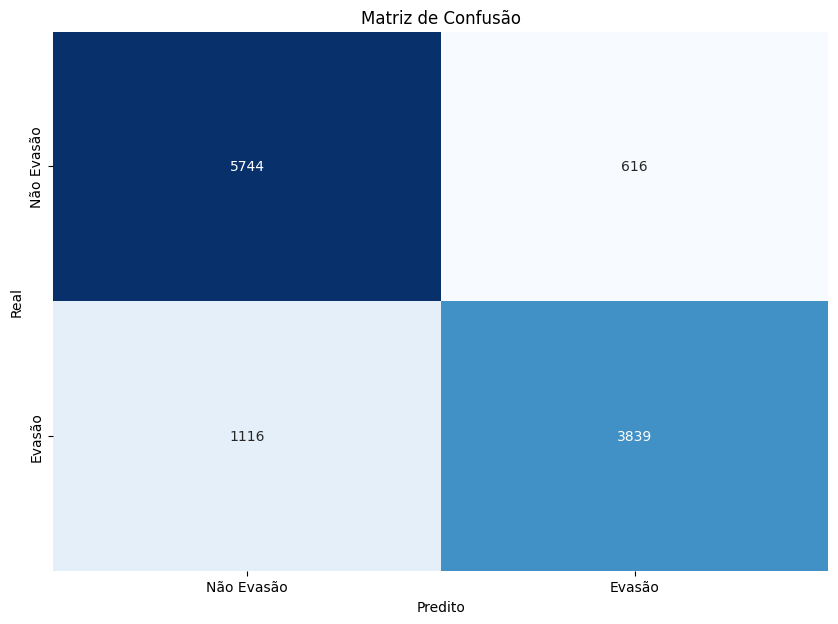

In [95]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Evasão', 'Evasão'], yticklabels=['Não Evasão', 'Evasão'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


Para otimizar o modelo Random Forest, o ajuste de hiperparâmetros é importante. Em vez de treinar com diferentes tamanhos de batch, a validação cruzada divide os dados em vários folds para avaliar o modelo de maneira mais robusta. O ajuste de  hiperparâmetros explora diversas configurações de parâmetros internos do modelo de RandomForest e usa a validação cruzada para evitar underfitting e overfitting, garantindo que o modelo tenha melhor desempenho em dados não vistos e melhora a precisão das previsões de evasão de alunos.  Nesse caso, o melhor modelo é escolhido com base na acurácia.

In [ ]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)

report = classification_report(Y_test, Y_pred)


Relatório de Classificação para o Melhor Modelo:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6360
           1       0.88      0.77      0.82      4955

    accuracy                           0.85     11315
   macro avg       0.86      0.85      0.85     11315
weighted avg       0.86      0.85      0.85     11315



In [ ]:

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

cv_folds_list = [5, 10, 15]

resultados = {}

for cv_folds in cv_folds_list:
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv_folds, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    best_model = grid_search.best_estimator_
    
    Y_pred = best_model.predict(X_test)
    
    resultados[cv_folds] = {
        'best_params': grid_search.best_params_,
        'accuracy': grid_search.best_score_,
        'classification_report': classification_report(Y_test, Y_pred)
    }


for cv_folds, metrics in resultados.items():
    print(f"Validação Cruzada com {cv_folds} Folds:")
    print(f"Melhores Parâmetros: {metrics['best_params']}")
    print(f"Acurácia: {metrics['accuracy']:.4f}")
    print(f"Relatório de Classificação:\n{metrics['classification_report']}")
    print("-" * 50)


Validação Cruzada com 5 Folds:
Melhores Parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Acurácia: 0.8594
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6360
           1       0.88      0.77      0.82      4955

    accuracy                           0.85     11315
   macro avg       0.86      0.85      0.85     11315
weighted avg       0.86      0.85      0.85     11315

--------------------------------------------------
Validação Cruzada com 10 Folds:
Melhores Parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Acurácia: 0.8590
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6360
           1       0.88      0.77      0.82      4955

    accuracy                           0.85     11315
   macro avg       0.86      0.85    

A conclusão tomada é de que, com a validação cruzada com 15 folds, e, considerando a acurácia como principal parâmetro de seleção, o modelo de RandomForest com os seguintes parâmetros foi selecionado: max_depth de 10, min_samples_leaf de 2, min_samples_split de 2 e n_estimators de 100. O max_depth de 10 evita overfitting, min_samples_leaf de 2 melhora a generalização, min_samples_split de 2 maximiza o uso dos dados e n_estimators de 100 equilibra complexidade e estabilidade das previsões. Esses ajustes visam otimizar a acurácia do modelo.
Esse modelo atingiu a acurácia de 85.95%, com um recall e f1-score altos tanto para a classificação do aluno que não evadiu, como o que evadiu. 

#### Predição de evasão usando RandomForest

A predição da probabilidade de evasão forneceu uma visão detalhada sobre o risco de evasão entre os alunos, com estatísticas descritivas destacando a distribuição das probabilidades. A média de 0,44 indica que, em geral, os alunos têm uma probabilidade moderada de evasão, enquanto a ampla faixa de valores, de 0 a 1, revela uma variabilidade significativa no risco de evasão.

Especificamente, a probabilidade mínima de 0 sugere que alguns alunos têm um risco muito baixo de evasão, enquanto a máxima de 1 indica um risco elevado. O intervalo interquartil (25% a 75%) mostra que metade das probabilidades de evasão está concentrada entre 0,09 e 0,88, o que demonstra que há uma ampla gama de riscos. O fato de a mediana estar em 0,28 indica que metade dos alunos tem uma probabilidade de evasão inferior a 28%, reforçando a ideia de que a evasão é um problema significativo, mas não universal.

Essas estatísticas podem ser utilizadas para direcionar intervenções mais eficazes, focando recursos e estratégias em alunos com maiores probabilidades de evasão, conforme indicado pelos valores mais altos. A distribuição observada sugere que há uma necessidade de estratégias personalizadas e focadas, aproveitando a previsão probabilística para apoiar os alunos de forma mais eficaz e melhorar a retenção.

In [174]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Previsões de probabilidade
probas_rf = rf_model.predict_proba(X_test)[:, 1]

results_rf = pd.DataFrame(X_test.reset_index(drop=True))  
results_rf['Probabilidade_Evasao'] = probas_rf

print("\nEstatísticas Descritivas das Probabilidades de Evasão:")
print(results_rf['Probabilidade_Evasao'].describe())

results_rf


Estatísticas Descritivas das Probabilidades de Evasão:
count    11315.000000
mean         0.437964
std          0.376357
min          0.000000
25%          0.090000
50%          0.280000
75%          0.880000
max          1.000000
Name: Probabilidade_Evasao, dtype: float64


ENEM  Ano_Nascimento   CRA  Modalidade_Inscrita  Num_Reprovacoes  \
0      679.44            1998  53.1                    7               21   
1      563.12            1998  38.7                    5                2   
2      642.82            1991  72.6                    7                3   
3      650.98            1997  60.0                    7                4   
4      439.38            1994  33.7                    0               14   
...       ...             ...   ...                  ...              ...   
11310  523.34            2001  60.2                    1                3   
11311  649.78            2003  84.3                    9                0   
11312  459.72            2000  55.2                    1                4   
11313  700.72            1993  76.7                    9                4   
11314  517.06            1996  25.2                    0               10   

       Probabilidade_Evasao  
0                      0.52  
1                      0.72  
2                      0.16  
3                      0.85  
4                      0.99  
...                     ...  
11310                  0.20  
11311                  0.18  
11312                  0.31  
11313                  0.08  
11314                  0.98  

[11315 rows x 6 columns]

### Aprendizado Não Supervisionado

Visando analisar o agrupamento de alunos, foi utilizado certas propriedades utilizadas anteriormente nos modelos, a fim de encontrar 2 agrupamentos de alunos. Após isso, é possível analisar as propriedades dos centroides, como a nota do ENEM e CRA, que possuem propriedades similares ao de elementos do mesmo cluster. Para isso, foi analisado a clusterização e analisado os clusteres com ENEM e CRA. 

As propriedades dos centróides revelam características distintas dos clusters formados. O Cluster 0 possui um valor médio de ENEM de 652.9955 e um CRA de 74.0162, com uma taxa de evasão de 21.55%. Isso sugere que este cluster representa um grupo com desempenhos relativamente altos no ENEM e um CRA elevado, além de uma taxa de evasão relativamente baixa.
Já o Cluster 1 tem um valor médio de ENEM de 601.2541 e um CRA de 36.7262, com uma taxa de evasão significativamente maior de 72.88%. Esse cluster parece abranger um grupo com desempenhos menores e um CRA mais baixo, associado a uma taxa de evasão muito mais alta. Essas diferenças indicam que os dois clusters representam grupos distintos em termos de desempenho acadêmico e comportamento de evasão.

Propriedades dos Centróides:
   Cluster        ENEM        CRA    Evasao
0        0  652.995527  74.016181  0.215452
1        1  601.254105  36.726203  0.728826


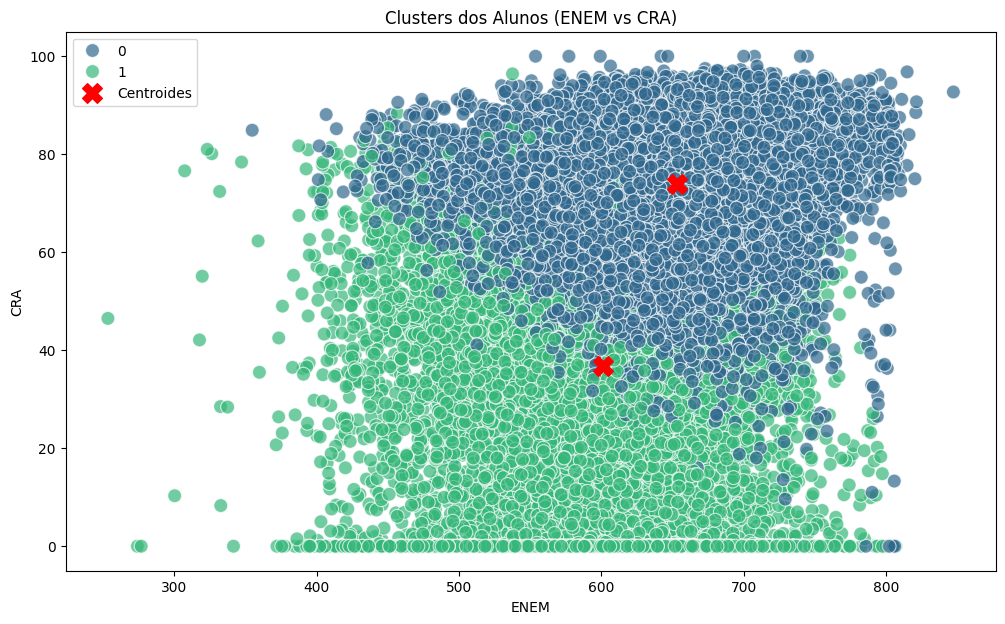

In [109]:
X = df_enem_clean[['ENEM', 'Ano_Nascimento', 'CRA', 'Modalidade_Inscrita', 'Num_Reprovacoes']]
Y = df_enem_clean['Evasao']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans.fit(X_scaled)
df_enem_clean['Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)  

df_enem_clean['Cluster'] = kmeans.labels_

evasao_means = df_enem_clean.groupby('Cluster')['Evasao'].mean().values

centroid_properties = pd.DataFrame(centroids, columns=['ENEM', 'Ano_Nascimento', 'CRA', 'Modalidade_Inscrita', 'Num_Reprovacoes'])
centroid_properties['Cluster'] = range(len(centroids))
centroid_properties['Evasao'] = evasao_means

print("Propriedades dos Centróides:")
print(centroid_properties[['Cluster', 'ENEM', 'CRA', 'Evasao']])

plt.figure(figsize=(12, 7))
sns.scatterplot(x='ENEM', y='CRA', hue='Cluster', palette='viridis', data=df_enem_clean, s=100, alpha=0.7)
plt.scatter(centroids[:, X.columns.get_loc('ENEM')], centroids[:, X.columns.get_loc('CRA')], c='red', s=200, marker='X', label='Centroides')
plt.title('Clusters dos Alunos (ENEM vs CRA)')
plt.xlabel('ENEM')
plt.ylabel('CRA')
plt.legend()
plt.show()

labels = df_enem_clean['Cluster']
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin = davies_bouldin_score(X_scaled, labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
inertia = kmeans.inertia_

ari = adjusted_rand_score(Y, labels)



O Silhouette Score de 0.2556 indica uma qualidade moderada de agrupamento, com pontos apenas parcialmente bem separados dos outros clusters. O Davies-Bouldin Index de 1.6579 sugere uma sobreposição moderada entre clusters, com separação não ideal. O Calinski-Harabasz Index de 12072.3326 indica que os clusters são bem definidos e separados. A Inércia de 142852.7035 revela que há uma quantidade significativa de variação dentro dos clusters, indicando possíveis melhorias na compactação. O Adjusted Rand Index (ARI) de 0.2716 mostra uma concordância moderada entre os rótulos verdadeiros e os clusters, sugerindo que o agrupamento pode ser aprimorado.

In [110]:
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
print(f"Inércia: {inertia:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Silhouette Score: 0.2556
Davies-Bouldin Index: 1.6579
Calinski-Harabasz Index: 12072.3326
Inércia: 142852.7035
Adjusted Rand Index (ARI): 0.2716


O pairplot pode ser usado para visualizar um possível agrupamento de dados em 2 clusteres.

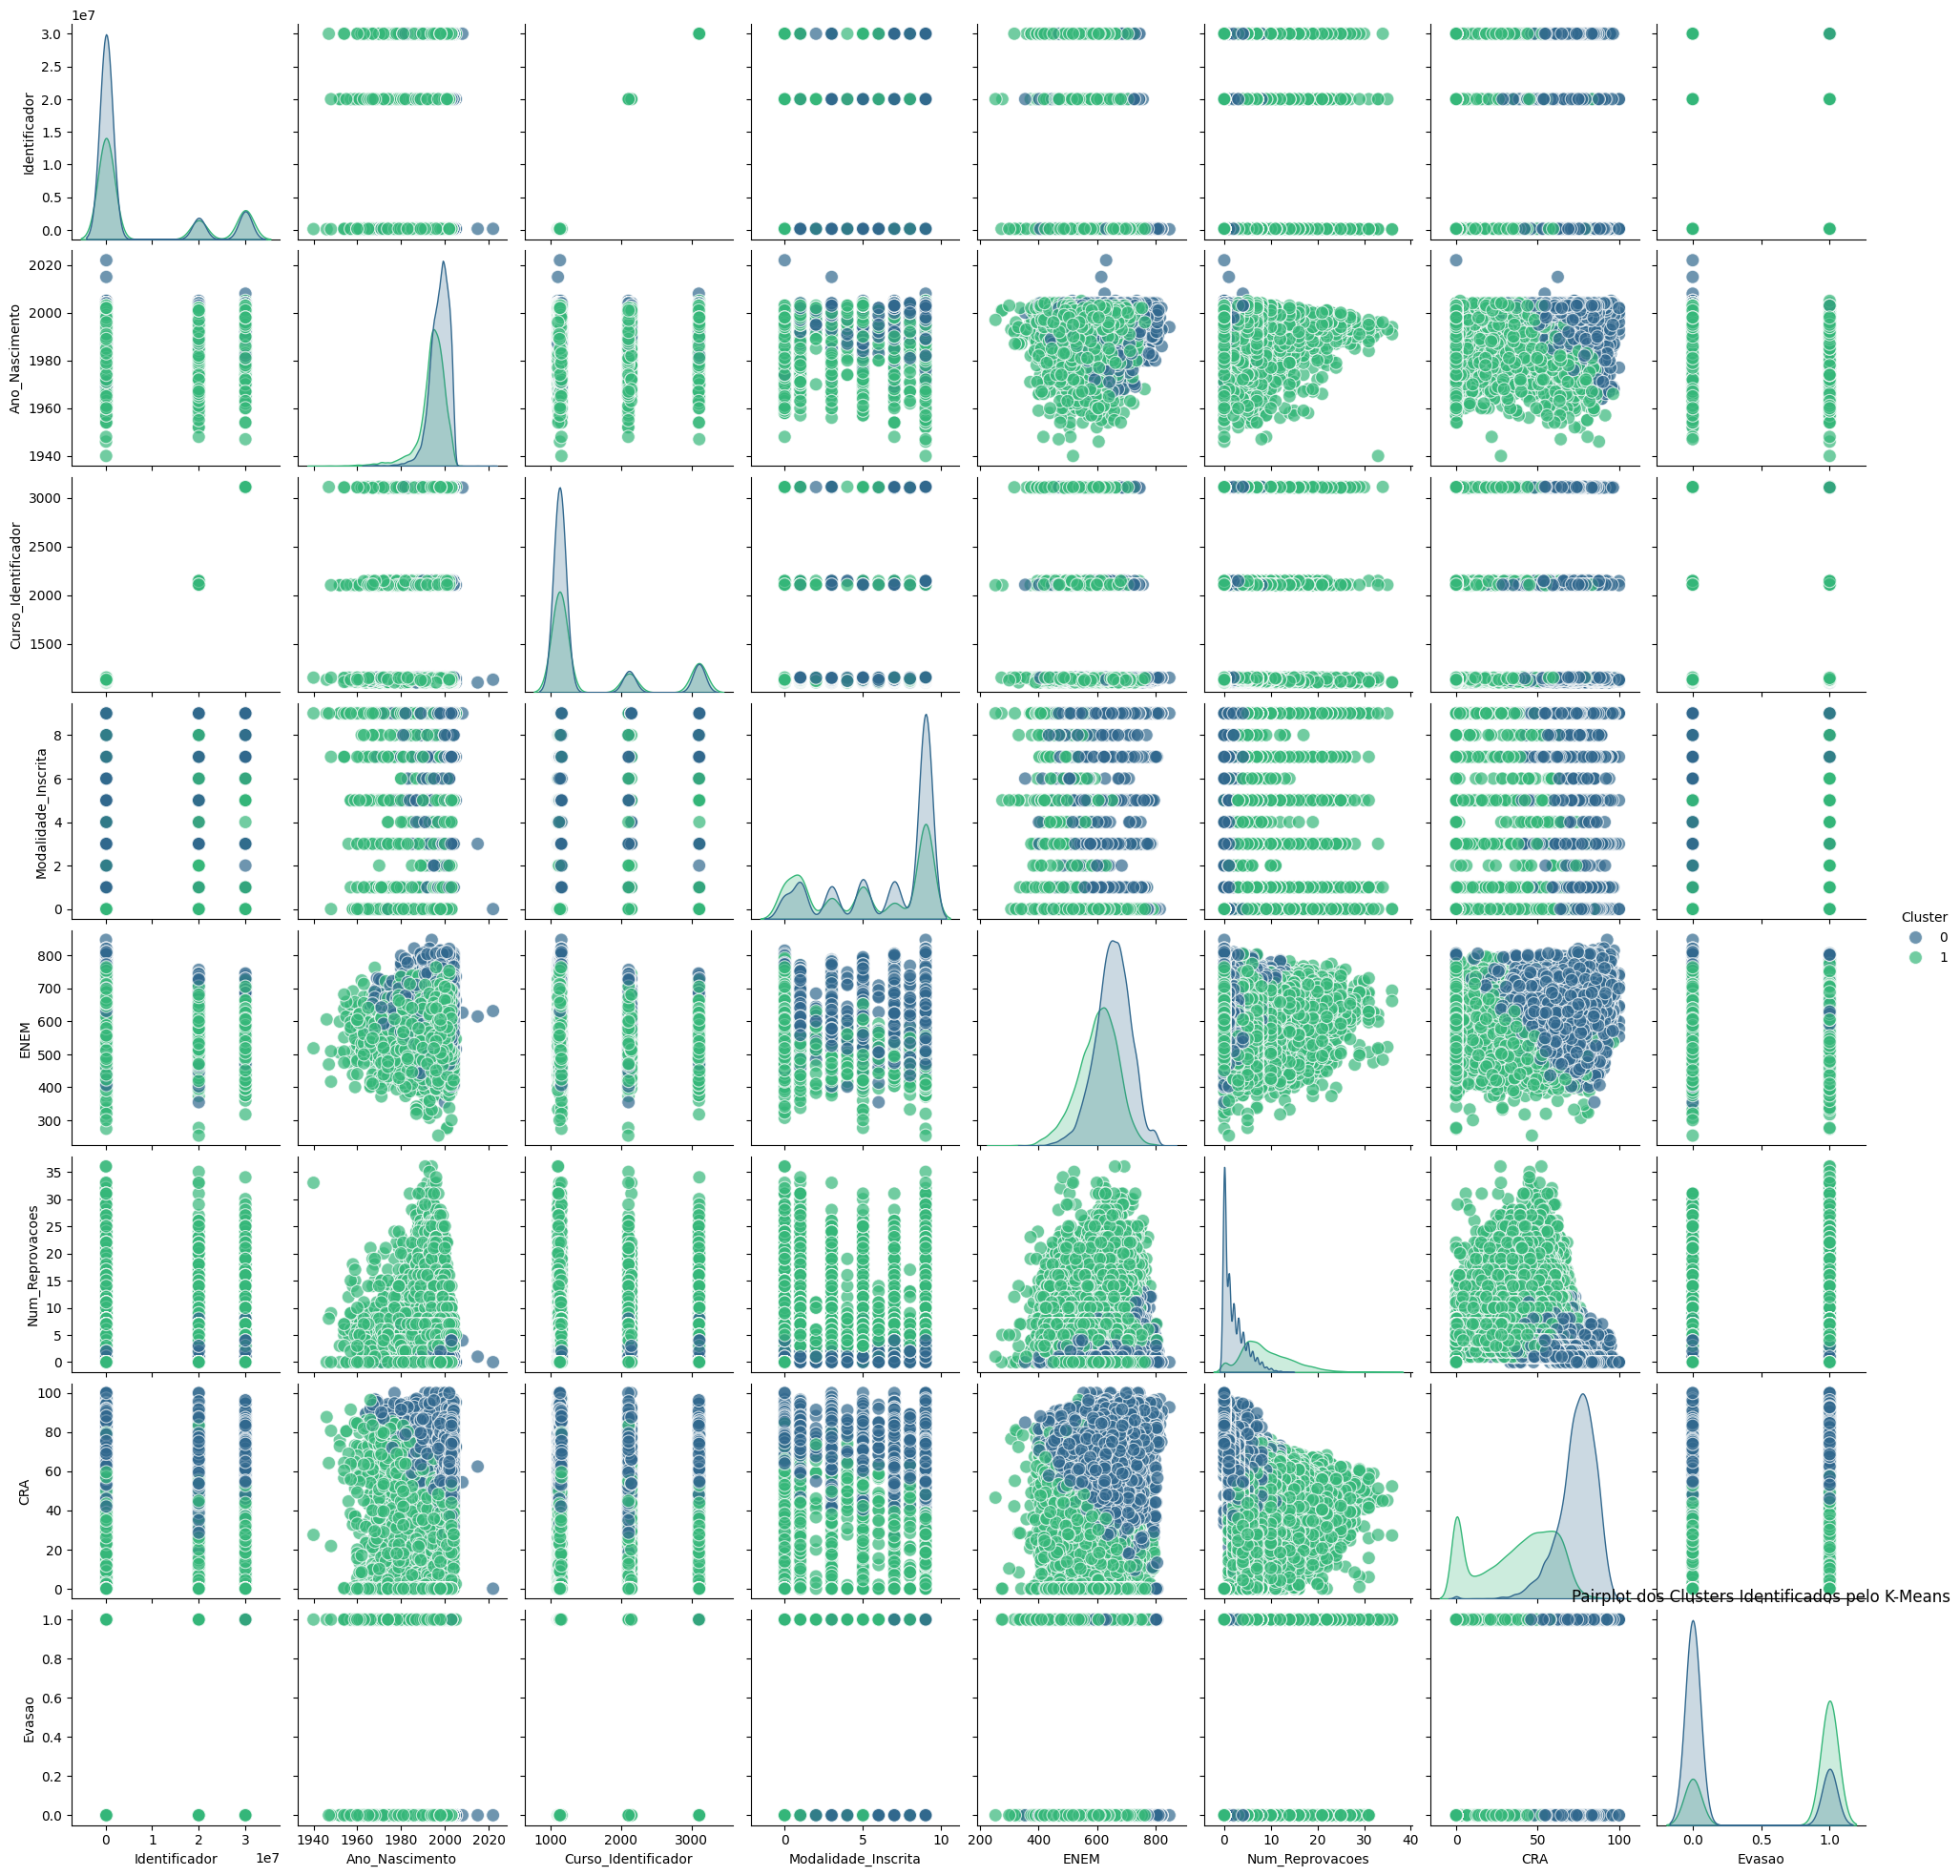

In [97]:
sns.pairplot(df_enem_clean, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'alpha':0.7, 's':100})
plt.title('Pairplot dos Clusters Identificados pelo K-Means')
plt.show()